In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-06-27 12:34:28,439 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-27 12:34:28,439 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-06-27 12:34:28,440 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-27 12:34:28,440 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-06-27 12:34:28,441 Parameters: cosmological_simulation   = 0.0


In [3]:
def plot2(x,y,z,Title,four=True, vmin_=None, vmax_=None):
    x_bin = 10**np.linspace(np.log10(np.max(x))-5,np.log10(np.max(x)),30)
    y_bin = 10**np.linspace(np.log10(np.max(y))-5,np.log10(np.max(y)),30)
 
    
    get_cmap("cet_CET_R3")
    
    if four == True:
    
        fig = plt.figure(figsize=(18,8))

        p1 = fig.add_subplot(1,3,1)
        p1.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.xlim(10**-30, 10**-25)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')
        plt.title(Title[0], fontsize=18)

        hist1,xedges,yedges = np.histogram2d(x,y,bins=[x_bin,y_bin],normed=False,weights=z[0])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb1 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb1.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb1.remove()
        
        
        p2 = fig.add_subplot(1,3,2)
        p2.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.xlim(10**-30, 10**-25)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[1], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(color='white')

        hist2,xedges,yedges = np.histogram2d(x,y,bins=[x_bin,y_bin],normed=False,weights=z[1])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb2 = plt.colorbar()
#         cb2.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb2.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb2.remove()
        
        
        p3 = fig.add_subplot(1,3,3)
        p3.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[2], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(color='white')

        hist3,xedges,yedges = np.histogram2d(x,y,bins=[x_bin,y_bin],normed=False,weights=z[2])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist3.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb3 = plt.colorbar()
        cb3.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb3.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        plt.tight_layout(pad=6)
        
        h1_bins = np.zeros(len(hist1))
        h2_bins = np.zeros(len(hist2))
        h3_bins = np.zeros(len(hist3))

        
        for i in range(len(hist1)):
            h1_bins[i] = np.sum(hist1[i])
            h2_bins[i] = np.sum(hist2[i])
            h3_bins[i] = np.sum(hist3[i])
        
        
        print('hist 1 sum: ', "{:.3e}".format(np.sum(hist1)))
        print('hist 1 max bin: ', "{:.3e}".format(np.max(h1_bins)))
        print('hist 1 min bin: ', "{:.3e}".format(np.min(h1_bins[np.nonzero(h1_bins)])))
        print(' ')
        print('hist 2 sum: ', "{:.3e}".format(np.sum(hist2)))
        print('hist 2 max bin: ', "{:.3e}".format(np.max(h2_bins)))
        print('hist 2 min bin: ', "{:.3e}".format(np.min(h2_bins[np.nonzero(h2_bins)])))
        print(' ')
        print('hist 3 sum: ', "{:.3e}".format(np.sum(hist3)))
        print('hist 3 max bin: ', "{:.3e}".format(np.max(h3_bins)))
        print('hist 3 min bin: ', "{:.3e}".format(np.min(h3_bins[np.nonzero(h3_bins)])))

       
        
    else:
        fig = plt.figure(figsize=(14,8))

        p1 = fig.add_subplot(1,2,1)
        p1.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[0], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist1,xedges,yedges = np.histogram2d(x,y,bins=[x_bin,y_bin],normed=False,weights=z[0])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb1 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb1.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb1.remove()
        
        p2 = fig.add_subplot(1,2,2)
        p2.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[1], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(color='w')

        hist2,xedges,yedges = np.histogram2d(x,y,bins=[x_bin,y_bin],normed=False,weights=z[1])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb2 = plt.colorbar()
        cb2.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb2.ax.tick_params(labelsize='large')  
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        plt.tight_layout(pad=8)
        
        h1_bins = np.zeros(len(hist1))
        h2_bins = np.zeros(len(hist2))
     
        for i in range(len(hist1)):
            h1_bins[i] = np.sum(hist1[i])
            h2_bins[i] = np.sum(hist2[i])
        
        print('hist 1 sum: ', "{:.3e}".format(np.sum(hist1)))
        print('hist 1 max bin: ', "{:.3e}".format(np.max(h1_bins)))
        print('hist 1 min bin: ', "{:.3e}".format(np.min(h1_bins[np.nonzero(h1_bins)])))
        print(' ')
        print('hist 2 sum: ', "{:.3e}".format(np.sum(hist2)))
        print('hist 2 max bin: ', "{:.3e}".format(np.max(h2_bins)))
        print('hist 2 min bin: ', "{:.3e}".format(np.min(h2_bins[np.nonzero(h2_bins)])))

In [4]:
def big_plot(x,y,z,Title,four=True, vmin_=None, vmax_=None):
#     x_bin = np.zeros(len(x))
#     y_bin = np.zeros(len(y))
    
    x_bin = []
    y_bin = []
    
    for i in range(len(x)):
        xbin = 10**np.linspace(np.log10(np.max(x[i]))-5,np.log10(np.max(x[i])),30)
        ybin = 10**np.linspace(np.log10(np.max(y[i]))-5,np.log10(np.max(y[i])),30)
        
        x_bin.append(xbin)
        y_bin.append(ybin)
 
    
    get_cmap("cet_CET_R3")
    
    if four == True:
    
        fig = plt.figure(figsize=(18,30))

        p1 = fig.add_subplot(6,3,1)
        p1.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.xlim(10**-30, 10**-25)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')
        plt.title(Title[0], fontsize=18)

        hist1,xedges,yedges = np.histogram2d(x[0],y[0],bins=[x_bin[0],y_bin[0]],normed=False,weights=z[0])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb1 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb1.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb1.remove()
        
        
        p2 = fig.add_subplot(6,3,2)
        p2.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.xlim(10**-30, 10**-25)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[1], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist2,xedges,yedges = np.histogram2d(x[0],y[0],bins=[x_bin[0],y_bin[0]],normed=False,weights=z[1])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb2 = plt.colorbar()
#         cb2.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb2.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb2.remove()
        
        
        p3 = fig.add_subplot(6,3,3)
        p3.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[2], fontsize=18)
        plt.xticks(fontsize='large')
#         plt.xticks(ticks=[])
        plt.yticks(ticks=[])

        hist3,xedges,yedges = np.histogram2d(x[0],y[0],bins=[x_bin[0],y_bin[0]],normed=False,weights=z[2])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist3.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb3 = plt.colorbar()
        cb3.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb3.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        p4 = fig.add_subplot(6,3,4)
        p4.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[3], fontsize=18)
        plt.xticks(fontsize='large')
#         plt.xticks(ticks=[])
        plt.yticks(fontsize='large')

        hist4,xedges,yedges = np.histogram2d(x[1],y[1],bins=[x_bin[1],y_bin[1]],normed=False,weights=z[3])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb4 = plt.colorbar()
        cb4.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb4.remove()
        
        
        p5 = fig.add_subplot(6,3,5)
        p5.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[4], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist5,xedges,yedges = np.histogram2d(x[1],y[1],bins=[x_bin[1],y_bin[1]],normed=False,weights=z[4])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist5.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb5 = plt.colorbar()
        cb5.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb5.remove()
        
        
        p6 = fig.add_subplot(6,3,6)
        p6.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[5], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist6,xedges,yedges = np.histogram2d(x[1],y[1],bins=[x_bin[1],y_bin[1]],normed=False,weights=z[5])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist6.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb6 = plt.colorbar()
        cb6.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb6.set_label(label='Ion Mass [M$_\odot$]', size=14)
        
        
        p7 = fig.add_subplot(6,3,7)
        p7.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[6], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist7,xedges,yedges = np.histogram2d(x[2],y[2],bins=[x_bin[2],y_bin[2]],normed=False,weights=z[6])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist7.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb7 = plt.colorbar()
        cb7.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb7.remove()
        
        
        
        p8 = fig.add_subplot(6,3,8)
        p8.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[7], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist8,xedges,yedges = np.histogram2d(x[2],y[2],bins=[x_bin[2],y_bin[2]],normed=False,weights=z[7])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist8.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb8 = plt.colorbar()
        cb8.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb8.remove()
        
        
        p9 = fig.add_subplot(6,3,9)
        p9.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[8], fontsize=18)
        plt.xticks(fontsize='large')
#         plt.xticks(ticks=[])
        plt.yticks(ticks=[])

        hist9,xedges,yedges = np.histogram2d(x[2],y[2],bins=[x_bin[2],y_bin[2]],normed=False,weights=z[8])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist9.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb9 = plt.colorbar()
        cb9.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb6.set_label(label='Ion Mass [M$_\odot$]', size=14)
        
        
        
        p10 = fig.add_subplot(6,3,10)
        p10.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[9], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist10,xedges,yedges = np.histogram2d(x[3],y[3],bins=[x_bin[3],y_bin[3]],normed=False,weights=z[9])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist10.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb10 = plt.colorbar()
        cb10.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb10.remove()
        
        
        
        p11 = fig.add_subplot(6,3,11)
        p11.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[10], fontsize=18)
#         plt.xticks(ticks=[])
        plt.yticks(ticks=[])
        plt.xticks(fontsize='large')

        hist11,xedges,yedges = np.histogram2d(x[3],y[3],bins=[x_bin[3],y_bin[3]],normed=False,weights=z[10])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist11.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb11 = plt.colorbar()
        cb11.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb11.remove()
        
        
        p12 = fig.add_subplot(6,3,12)
        p12.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[11], fontsize=18)
        plt.xticks(fontsize='large')
#         plt.xticks(ticks=[])
        plt.yticks(ticks=[])

        hist12,xedges,yedges = np.histogram2d(x[3],y[3],bins=[x_bin[3],y_bin[3]],normed=False,weights=z[11])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist12.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb12 = plt.colorbar()
        cb12.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb12.set_label(label='Ion Mass [M$_\odot$]', size=14)
        
        
        
        p13 = fig.add_subplot(6,3,13)
        p13.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[12], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist13,xedges,yedges = np.histogram2d(x[4],y[4],bins=[x_bin[4],y_bin[4]],normed=False,weights=z[12])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist13.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb13 = plt.colorbar()
        cb13.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb13.remove()
        
        
        
        p14 = fig.add_subplot(6,3,14)
        p14.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[13], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist14,xedges,yedges = np.histogram2d(x[4],y[4],bins=[x_bin[4],y_bin[4]],normed=False,weights=z[13])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist14.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb14 = plt.colorbar()
        cb14.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb14.remove()
        
        
        p15 = fig.add_subplot(6,3,15)
        p15.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[14], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist15,xedges,yedges = np.histogram2d(x[4],y[4],bins=[x_bin[4],y_bin[4]],normed=False,weights=z[14])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist15.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb15 = plt.colorbar()
        cb15.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb15.set_label(label='Ion Mass [M$_\odot$]', size=14)
        
        p16 = fig.add_subplot(6,3,16)
        p16.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[15], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist16,xedges,yedges = np.histogram2d(x[5],y[5],bins=[x_bin[5],y_bin[5]],normed=False,weights=z[15])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist16.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb16 = plt.colorbar()
        cb16.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb16.remove()
        
        
        
        p17 = fig.add_subplot(6,3,17)
        p17.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[16], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist17,xedges,yedges = np.histogram2d(x[5],y[5],bins=[x_bin[5],y_bin[5]],normed=False,weights=z[16])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist17.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb17 = plt.colorbar()
        cb17.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb17.remove()
        
        
        p18 = fig.add_subplot(6,3,18)
        p18.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[17], fontsize=18)
#         plt.xticks(ticks=[])
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist18,xedges,yedges = np.histogram2d(x[5],y[5],bins=[x_bin[5],y_bin[5]],normed=False,weights=z[17])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist15.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb18 = plt.colorbar()
        cb18.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb18.set_label(label='Ion Mass [M$_\odot$]', size=14)
        
        
        plt.tight_layout(h_pad=1.2, w_pad=6)



       
        
    else:
        fig = plt.figure(figsize=(12,34))

        p1 = fig.add_subplot(6,2,1)
        p1.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[0], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist1,xedges,yedges = np.histogram2d(x[0],y[0],bins=[x_bin[0],y_bin[0]],normed=False,weights=z[0])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb1 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb1.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb1.remove()
        
        p2 = fig.add_subplot(6,2,2)
        p2.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[1], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist2,xedges,yedges = np.histogram2d(x[0],y[0],bins=[x_bin[0],y_bin[0]],normed=False,weights=z[1])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb2 = plt.colorbar()
        cb2.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb2.ax.tick_params(labelsize='large')  
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        p3 = fig.add_subplot(6,2,3)
        p3.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[2], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist3,xedges,yedges = np.histogram2d(x[1],y[1],bins=[x_bin[1],y_bin[1]],normed=False,weights=z[2])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist3.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb3 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb3.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb3.remove()
        
        p4 = fig.add_subplot(6,2,4)
        p4.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[3], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist4,xedges,yedges = np.histogram2d(x[1],y[1],bins=[x_bin[1],y_bin[1]],normed=False,weights=z[3])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb4 = plt.colorbar()
        cb4.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb4.ax.tick_params(labelsize='large')  
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        p5 = fig.add_subplot(6,2,5)
        p5.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[4], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist5,xedges,yedges = np.histogram2d(x[2],y[2],bins=[x_bin[2],y_bin[2]],normed=False,weights=z[4])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist5.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb5 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb5.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb5.remove()
        
        p6 = fig.add_subplot(6,2,6)
        p6.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[5], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist6,xedges,yedges = np.histogram2d(x[2],y[2],bins=[x_bin[2],y_bin[2]],normed=False,weights=z[5])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist6.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb6 = plt.colorbar()
        cb6.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb6.ax.tick_params(labelsize='large')  
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        p7 = fig.add_subplot(6,2,7)
        p7.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[6], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist7,xedges,yedges = np.histogram2d(x[3],y[3],bins=[x_bin[3],y_bin[3]],normed=False,weights=z[6])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist7.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb7 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb7.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb7.remove()
        
        p8 = fig.add_subplot(6,2,8)
        p8.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[7], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist8,xedges,yedges = np.histogram2d(x[3],y[3],bins=[x_bin[3],y_bin[3]],normed=False,weights=z[7])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist8.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb8 = plt.colorbar()
        cb8.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb8.ax.tick_params(labelsize='large')  
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        p9 = fig.add_subplot(6,2,9)
        p9.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[8], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist9,xedges,yedges = np.histogram2d(x[4],y[4],bins=[x_bin[4],y_bin[4]],normed=False,weights=z[8])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist9.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb9 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb9.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb9.remove()
        
        p10 = fig.add_subplot(6,2,10)
        p10.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[9], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist10,xedges,yedges = np.histogram2d(x[4],y[4],bins=[x_bin[4],y_bin[4]],normed=False,weights=z[9])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist10.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb10 = plt.colorbar()
        cb10.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb10.ax.tick_params(labelsize='large')  
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        p11 = fig.add_subplot(6,2,11)
        p11.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
        plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[10], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(fontsize='large')

        hist11,xedges,yedges = np.histogram2d(x[5],y[5],bins=[x_bin[5],y_bin[5]],normed=False,weights=z[10])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist11.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb11 = plt.colorbar()
#         cb1.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb11.ax.tick_params(labelsize='large')
        plt.clim(vmin=vmin_, vmax=vmax_)
        cb11.remove()
        
        p12 = fig.add_subplot(6,2,12)
        p12.set_facecolor('black')
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim(10**-30, 10**-25)
        plt.xlabel('Density $(g /cm^3)$', fontsize=14)
#         plt.ylabel('Temperature [K]', fontsize=14)
        plt.title(Title[11], fontsize=18)
        plt.xticks(fontsize='large')
        plt.yticks(ticks=[])

        hist12,xedges,yedges = np.histogram2d(x[5],y[5],bins=[x_bin[5],y_bin[5]],normed=False,weights=z[11])
        plt.pcolormesh(xedges[:-1],yedges[:-1],hist12.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

        cb12 = plt.colorbar()
        cb12.set_label(label='Ion Mass [M$_\odot$]', size=14)
        cb12.ax.tick_params(labelsize='large')  
        plt.clim(vmin=vmin_, vmax=vmax_)
        
        
        plt.tight_layout(h_pad=1.2, w_pad=6)

In [6]:
def name(ions, N=6):
    Titles = []

    for i in range(N):
        for j in range(len(ions)):
            titles =  ions[j] + ' (Ray ' + str(int(i)+1) + ')'
            Titles.append(titles)
    return Titles

In [7]:
def make_ray(x0, y0, z0, x, y, z, file):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= file,
                                 lines='all',
                                 ftype='gas')
    return ray

# Make Rays and Add Ionization Fields

In [8]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 'ray1.h5')
ray2 = make_ray(1.2524, 0.33, 0, 1.2524, 0.48, 1, 'ray2.h5')
ray3 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 'ray3.h5')
ray4 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 'ray4.h5')
ray5 = make_ray(0,0.11,0, 2, 0.96, 0.8, 'ray5.h5')
ray7 = make_ray(0,0.4,0.482, 2, 0.4, 0.482, 'ray7.h5')

yt : [INFO     ] 2022-06-27 12:43:02,923 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-06-27 12:43:02,926 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-06-27 12:43:03,673 Saving field data to yt dataset: ray1.h5.
yt : [INFO     ] 2022-06-27 12:43:03,756 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-06-27 12:43:03,757 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-06-27 12:43:03,757 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-06-27 12:43:03,758 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022

In [9]:
trident.add_ion_fields(ray7, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [INFO     ] 2022-06-27 12:43:26,439 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 12:43:26,448 Identified 2.490e+02 octs


In [10]:
trident.add_ion_fields(ray5, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

yt : [INFO     ] 2022-06-27 12:43:28,524 Allocating for 9.330e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 12:43:28,533 Identified 5.530e+02 octs


In [11]:
trident.add_ion_fields(ray4, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

yt : [INFO     ] 2022-06-27 12:43:29,386 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 12:43:29,395 Identified 1.210e+02 octs


In [12]:
trident.add_ion_fields(ray3, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

yt : [INFO     ] 2022-06-27 12:43:30,268 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 12:43:30,276 Identified 1.210e+02 octs


In [13]:
trident.add_ion_fields(ray2, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

yt : [INFO     ] 2022-06-27 12:43:31,246 Allocating for 2.940e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 12:43:31,255 Identified 2.330e+02 octs


In [14]:
trident.add_ion_fields(ray1, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

yt : [INFO     ] 2022-06-27 12:43:33,352 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 12:43:33,361 Identified 1.210e+02 octs


# Good ol' H

In [15]:
den = np.array(ray1.all_data()[('gas','density')])
temp = np.array(ray1.all_data()[('gas','temperature')])
M= 1.9884099E30 

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  2.927e+05
hist 1 max bin:  1.196e+05
hist 1 min bin:  7.045e-06
 
hist 2 sum:  1.175e+06
hist 2 max bin:  3.998e+05
hist 2 min bin:  8.021e+01


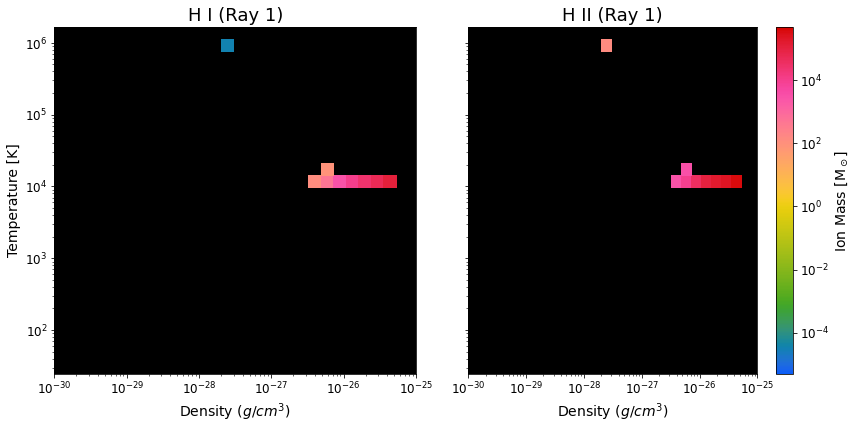

In [16]:
HI1 = np.array(ray1.all_data()['H_p0_mass'])/M
HII1 = np.array(ray1.all_data()['H_p1_mass'])/M

plot2(den,temp,[HI1,HII1], ['H I (Ray 1)', 'H II (Ray 1)'], four=False, vmin_=5*10**-6, vmax_=5*10**5)

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  2.558e+03
hist 1 max bin:  1.798e+03
hist 1 min bin:  3.022e-05
 
hist 2 sum:  7.928e+04
hist 2 max bin:  3.134e+04
hist 2 min bin:  1.958e+02


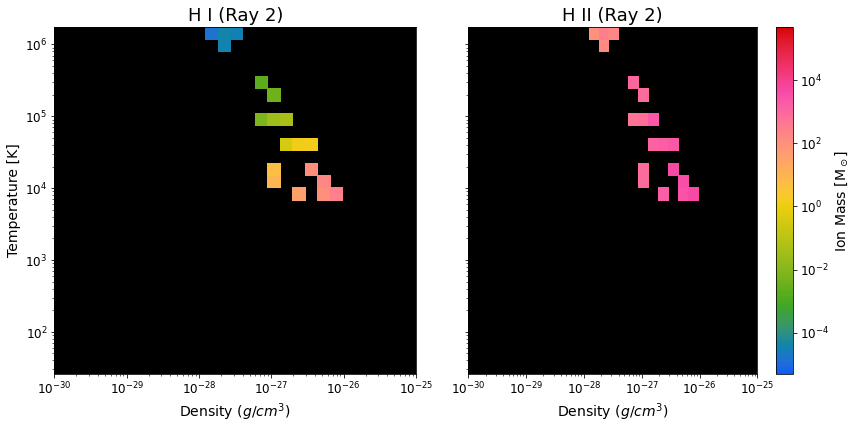

In [17]:
den2 = np.array(ray2.all_data()[('gas','density')])
temp2 = np.array(ray2.all_data()[('gas','temperature')])
HI2 = np.array(ray2.all_data()['H_p0_mass'])/M
HII2 = np.array(ray2.all_data()['H_p1_mass'])/M

plot2(den2,temp2,[HI2,HII2], ['H I (Ray 2)', 'H II (Ray 2)'], four=False, vmin_=5*10**-6, vmax_=5*10**5)

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  6.605e+04
hist 1 max bin:  4.299e+04
hist 1 min bin:  2.777e-05
 
hist 2 sum:  2.637e+05
hist 2 max bin:  1.131e+05
hist 2 min bin:  1.949e+02


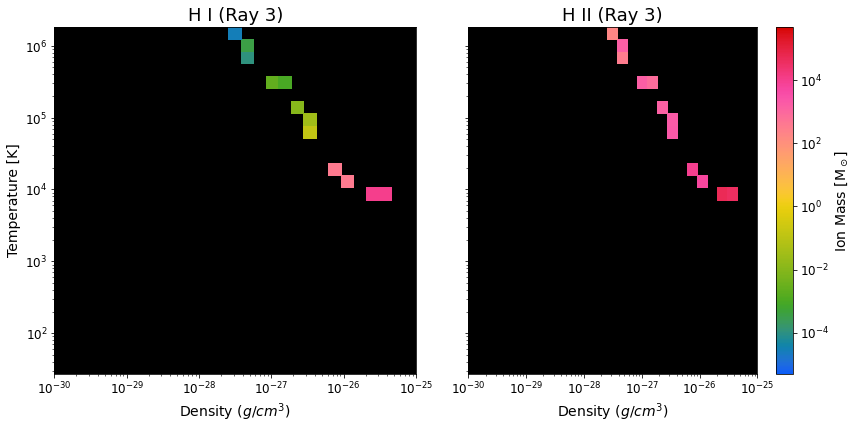

In [18]:
den3 = np.array(ray3.all_data()[('gas','density')])
temp3 = np.array(ray3.all_data()[('gas','temperature')])
HI3 = np.array(ray3.all_data()['H_p0_mass'])/M
HII3 = np.array(ray3.all_data()['H_p1_mass'])/M

plot2(den3,temp3,[HI3,HII3], ['H I (Ray 3)', 'H II (Ray 3)'], four=False, vmin_=5*10**-6, vmax_=5*10**5)

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  1.381e+05
hist 1 max bin:  7.732e+04
hist 1 min bin:  9.303e-06
 
hist 2 sum:  6.480e+05
hist 2 max bin:  3.123e+05
hist 2 min bin:  1.036e+02


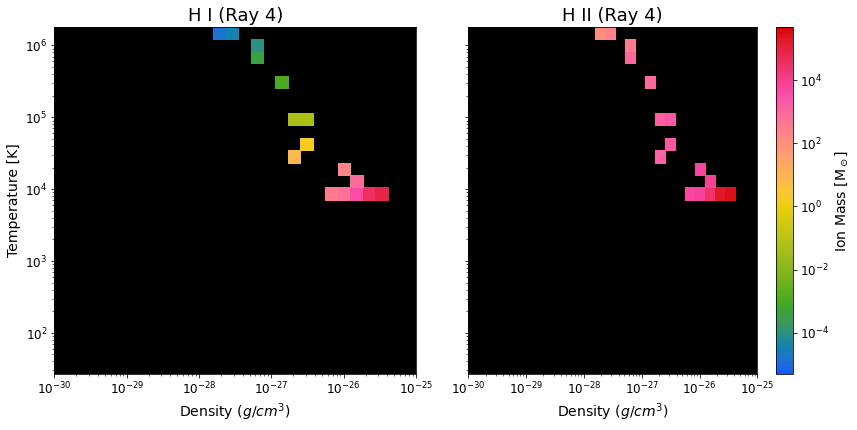

In [19]:
den4 = np.array(ray4.all_data()[('gas','density')])
temp4 = np.array(ray4.all_data()[('gas','temperature')])
HI4 = np.array(ray4.all_data()['H_p0_mass'])/M
HII4 = np.array(ray4.all_data()['H_p1_mass'])/M

plot2(den4,temp4,[HI4,HII4], ['H I (Ray 4)', 'H II (Ray 4)'], four=False, vmin_=5*10**-6, vmax_=5*10**5)

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  5.612e+04
hist 1 max bin:  4.279e+04
hist 1 min bin:  2.199e-05
 
hist 2 sum:  4.983e+05
hist 2 max bin:  2.446e+05
hist 2 min bin:  2.011e+02


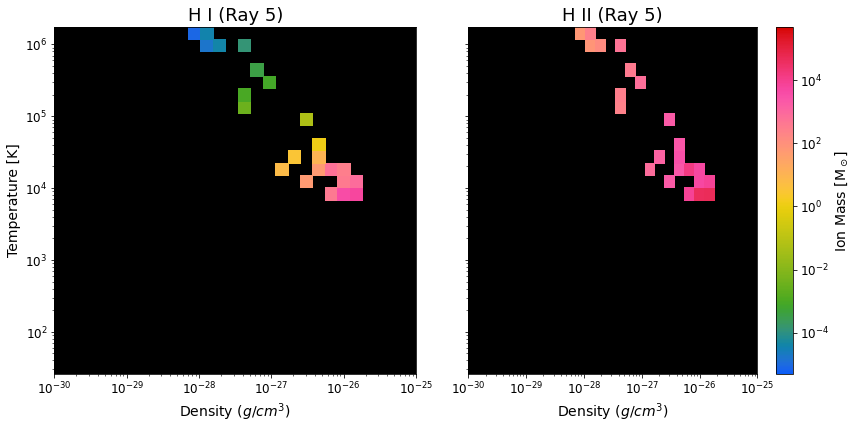

In [20]:
den5 = np.array(ray5.all_data()[('gas','density')])
temp5 = np.array(ray5.all_data()[('gas','temperature')])
HI5 = np.array(ray5.all_data()['H_p0_mass'])/M
HII5 = np.array(ray5.all_data()['H_p1_mass'])/M

plot2(den5,temp5,[HI5,HII5], ['H I (Ray 5)', 'H II (Ray 5)'], four=False, vmin_=5*10**-6, vmax_=5*10**5)

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  3.164e+05
hist 1 max bin:  9.243e+04
hist 1 min bin:  7.474e-06
 
hist 2 sum:  1.606e+06
hist 2 max bin:  4.667e+05
hist 2 min bin:  3.703e+01


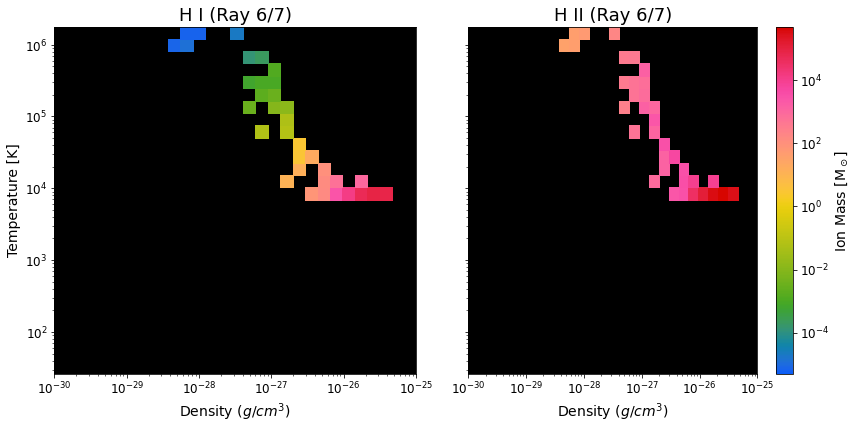

In [22]:
den7 = np.array(ray7.all_data()[('gas','density')])
temp7 = np.array(ray7.all_data()[('gas','temperature')])
HI7 = np.array(ray7.all_data()['H_p0_mass'])/M
HII7 = np.array(ray7.all_data()['H_p1_mass'])/M

plot2(den7,temp7,[HI7,HII7], ['H I (Ray 6/7)', 'H II (Ray 6/7)'], four=False, vmin_=5*10**-6, vmax_=5*10**5)

In [23]:
xx = np.array([den,den2,den3,den4,den5, den7])
yy = np.array([temp,temp2,temp3,temp4,temp5, temp7])
Hz = [HI1, HII1, HI2, HII2, HI3, HII3, HI4, HII4, HI5, HII5, HI7, HII7]

H_titles = name(['H I', 'H II'])

<ipython-input-23-a1180d972cdd>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xx = np.array([den,den2,den3,den4,den5, den7])
<ipython-input-23-a1180d972cdd>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yy = np.array([temp,temp2,temp3,temp4,temp5, temp7])


<ipython-input-4-eb5abf27fbb0>:428: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:448: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:468: MatplotlibDeprecationWarning: shading='flat' when X and Y have

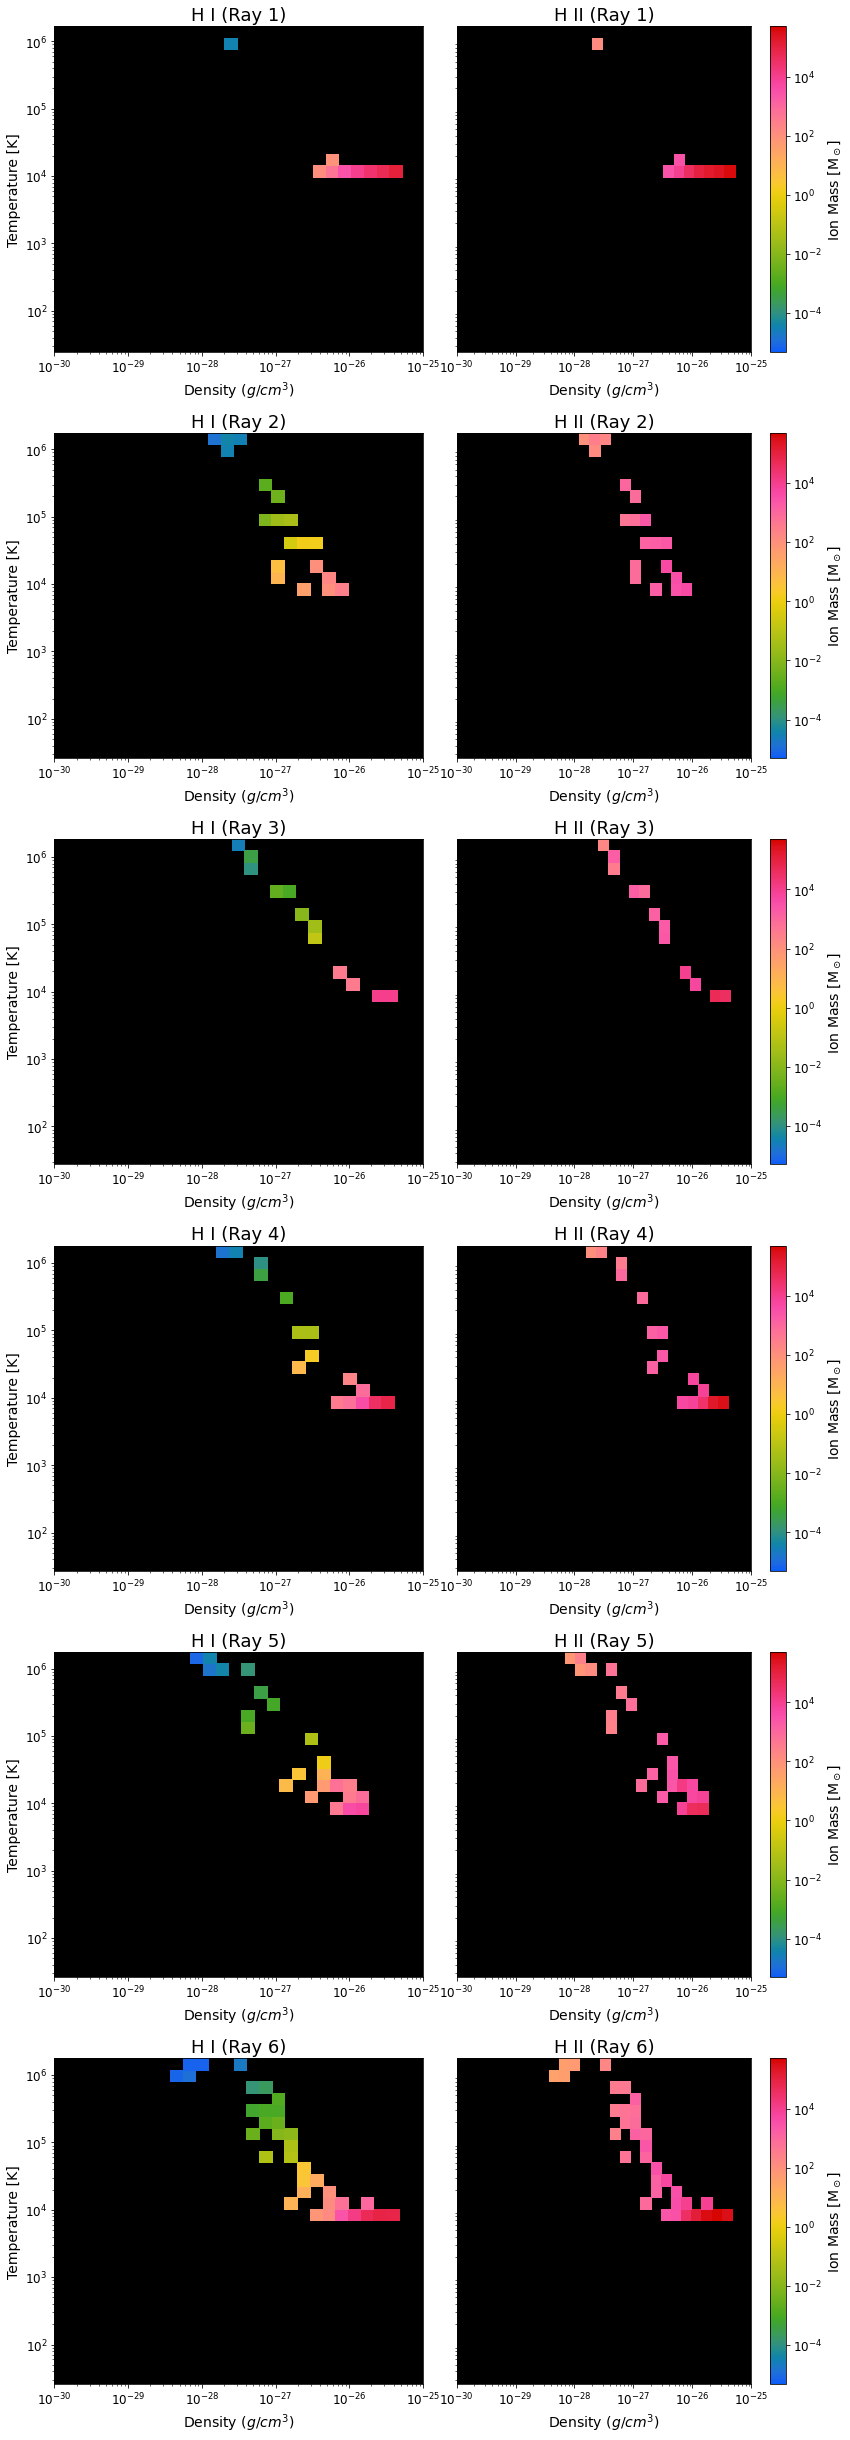

In [24]:
big_plot(xx,yy,Hz,H_titles,vmin_=5*10**-6, vmax_=5*10**5, four=False)

# Si

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  3.888e+02
hist 1 max bin:  1.426e+02
hist 1 min bin:  6.612e-01
 
hist 2 sum:  2.966e+01
hist 2 max bin:  7.673e+00
hist 2 min bin:  2.498e-01
 
hist 3 sum:  6.744e-01
hist 3 max bin:  1.406e-01
hist 3 min bin:  1.347e-08


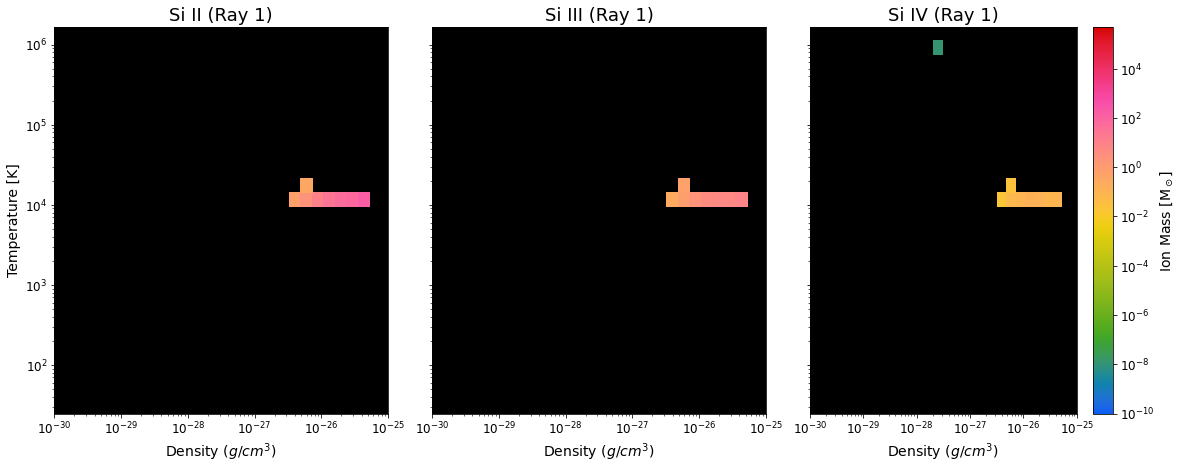

In [25]:
SiII1 = np.array(ray1.all_data()['Si_p1_mass'])/M
SiIII1 = np.array(ray1.all_data()['Si_p2_mass'])/M
SiIV1= np.array(ray1.all_data()['Si_p3_mass'])/M

plot2(den,temp,[SiII1,SiIII1,SiIV1], ['Si II (Ray 1)', 'Si III (Ray 1)', 'Si IV (Ray 1)'], vmin_=10**-10, vmax_=5*10**5)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  7.953e+00
hist 1 max bin:  4.548e+00
hist 1 min bin:  6.533e-06
 
hist 2 sum:  4.310e+00
hist 2 max bin:  1.558e+00
hist 2 min bin:  1.286e-03
 
hist 3 sum:  5.174e-01
hist 3 max bin:  1.287e-01
hist 3 min bin:  1.582e-10


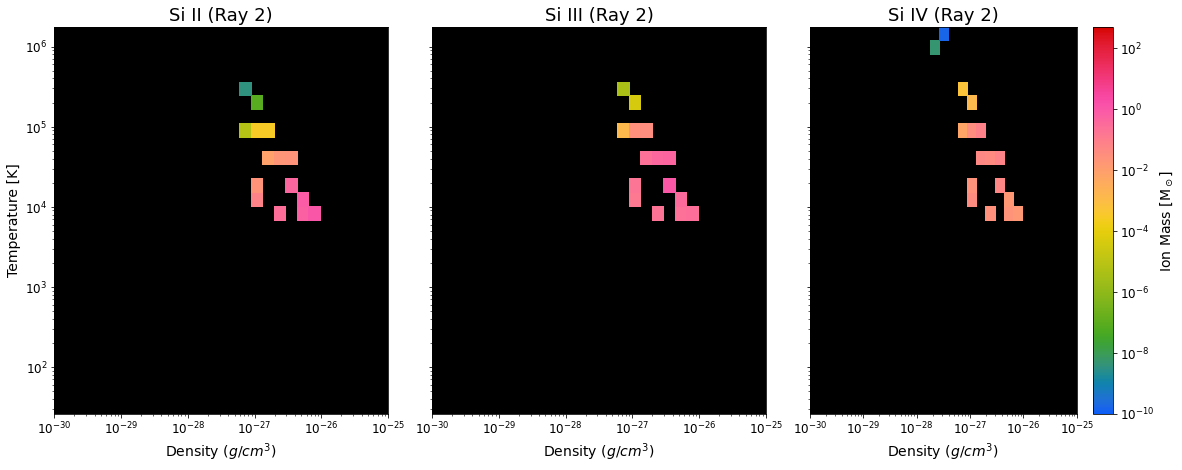

In [26]:
SiII2 = np.array(ray2.all_data()['Si_p1_mass'])/M
SiIII2 = np.array(ray2.all_data()['Si_p2_mass'])/M
SiIV2= np.array(ray2.all_data()['Si_p3_mass'])/M

plot2(den2,temp2,[SiII2,SiIII2,SiIV2], ['Si II (Ray 2)', 'Si III (Ray 2)', 'Si IV (Ray 2)'], vmin_=10**-10, vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  7.805e+01
hist 1 max bin:  4.335e+01
hist 1 min bin:  4.673e-10
 
hist 2 sum:  6.852e+00
hist 2 max bin:  1.835e+00
hist 2 min bin:  3.262e-10
 
hist 3 sum:  3.773e-01
hist 3 max bin:  2.487e-01
hist 3 min bin:  6.252e-07


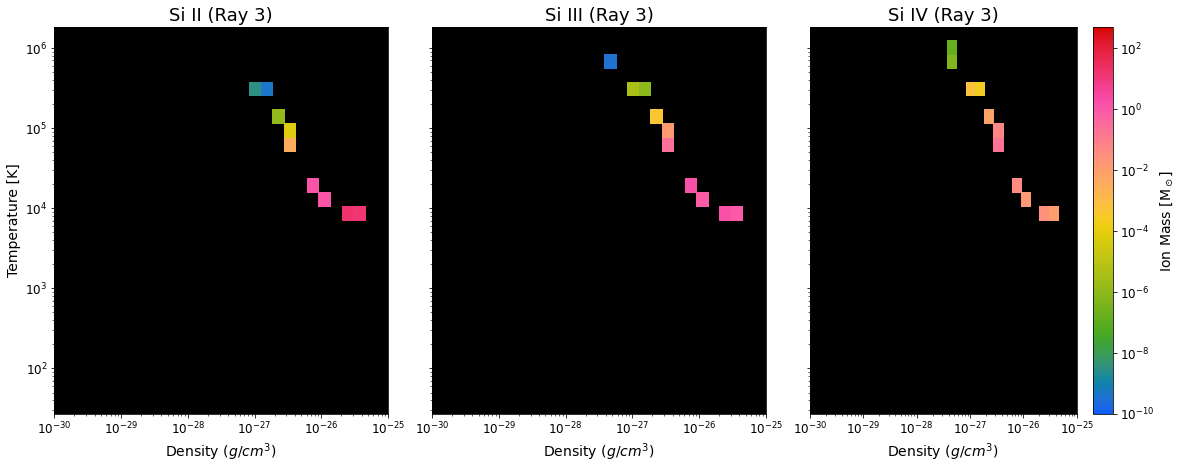

In [27]:
SiII3 = np.array(ray3.all_data()['Si_p1_mass'])/M
SiIII3 = np.array(ray3.all_data()['Si_p2_mass'])/M
SiIV3= np.array(ray3.all_data()['Si_p3_mass'])/M

plot2(den3,temp3,[SiII3,SiIII3,SiIV3], ['Si II (Ray 3)', 'Si III (Ray 3)', 'Si IV (Ray 3)'], vmin_=10**-10, vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  2.011e+02
hist 1 max bin:  1.058e+02
hist 1 min bin:  5.942e-10
 
hist 2 sum:  1.725e+01
hist 2 max bin:  6.875e+00
hist 2 min bin:  1.016e-08
 
hist 3 sum:  6.370e-01
hist 3 max bin:  1.962e-01
hist 3 min bin:  1.828e-10


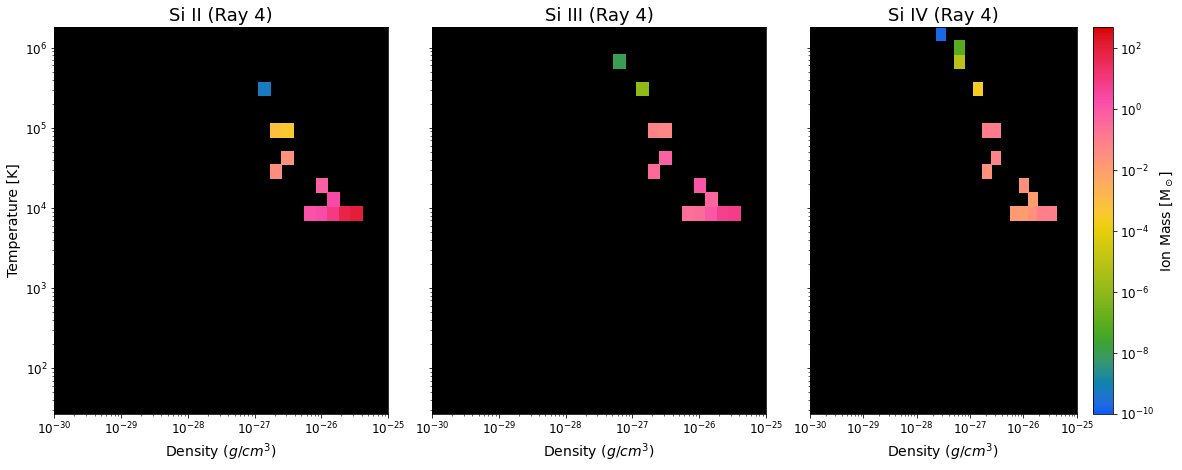

In [28]:
SiII4 = np.array(ray4.all_data()['Si_p1_mass'])/M
SiIII4 = np.array(ray4.all_data()['Si_p2_mass'])/M
SiIV4= np.array(ray4.all_data()['Si_p3_mass'])/M

plot2(den4,temp4,[SiII4,SiIII4,SiIV4], ['Si II (Ray 4)', 'Si III (Ray 4)', 'Si IV (Ray 4)'], vmin_=10**-10, vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  1.115e+02
hist 1 max bin:  7.613e+01
hist 1 min bin:  3.866e-10
 
hist 2 sum:  1.840e+01
hist 2 max bin:  7.008e+00
hist 2 min bin:  1.916e-07
 
hist 3 sum:  8.427e-01
hist 3 max bin:  1.848e-01
hist 3 min bin:  2.160e-09


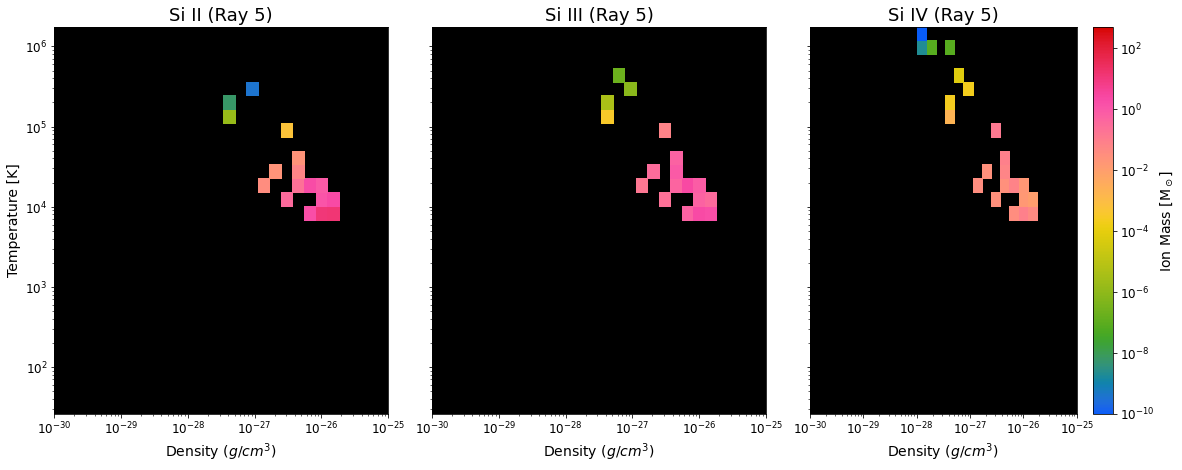

In [29]:
SiII5 = np.array(ray5.all_data()['Si_p1_mass'])/M
SiIII5 = np.array(ray5.all_data()['Si_p2_mass'])/M
SiIV5= np.array(ray5.all_data()['Si_p3_mass'])/M

plot2(den5,temp5,[SiII5,SiIII5,SiIV5], ['Si II (Ray 5)', 'Si III (Ray 5)', 'Si IV (Ray 5)'], 
      vmin_=10**-10, vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  4.921e+02
hist 1 max bin:  1.496e+02
hist 1 min bin:  8.874e-07
 
hist 2 sum:  4.769e+01
hist 2 max bin:  1.218e+01
hist 2 min bin:  2.654e-04
 
hist 3 sum:  1.585e+00
hist 3 max bin:  2.949e-01
hist 3 min bin:  7.232e-10


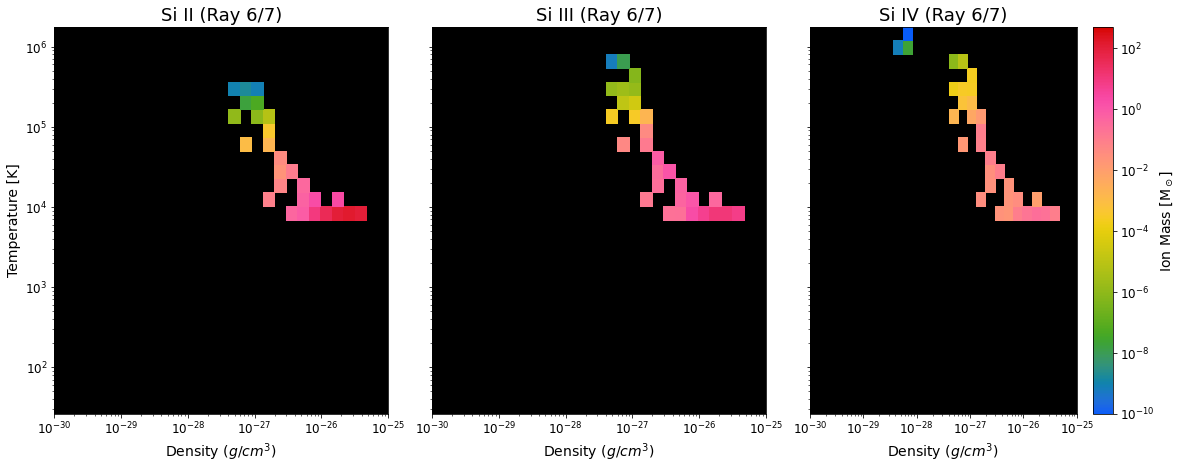

In [30]:
SiII7 = np.array(ray7.all_data()['Si_p1_mass'])/M
SiIII7 = np.array(ray7.all_data()['Si_p2_mass'])/M
SiIV7= np.array(ray7.all_data()['Si_p3_mass'])/M

plot2(den7,temp7,[SiII7,SiIII7,SiIV7], ['Si II (Ray 6/7)', 'Si III (Ray 6/7)', 'Si IV (Ray 6/7)'],
     vmin_=10**-10, vmax_=5*10**2)

In [31]:
Siz = [SiII1,SiIII1,SiIV1,SiII2,SiIII2,SiIV2,SiII3,SiIII3,SiIV3,
     SiII4,SiIII4,SiIV4,SiII5,SiIII5,SiIV5, SiII7, SiIII7, SiIV7]
Si_titles = name(['Si II', 'Si III', 'Si IV'])

<ipython-input-4-eb5abf27fbb0>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:57: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:79: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

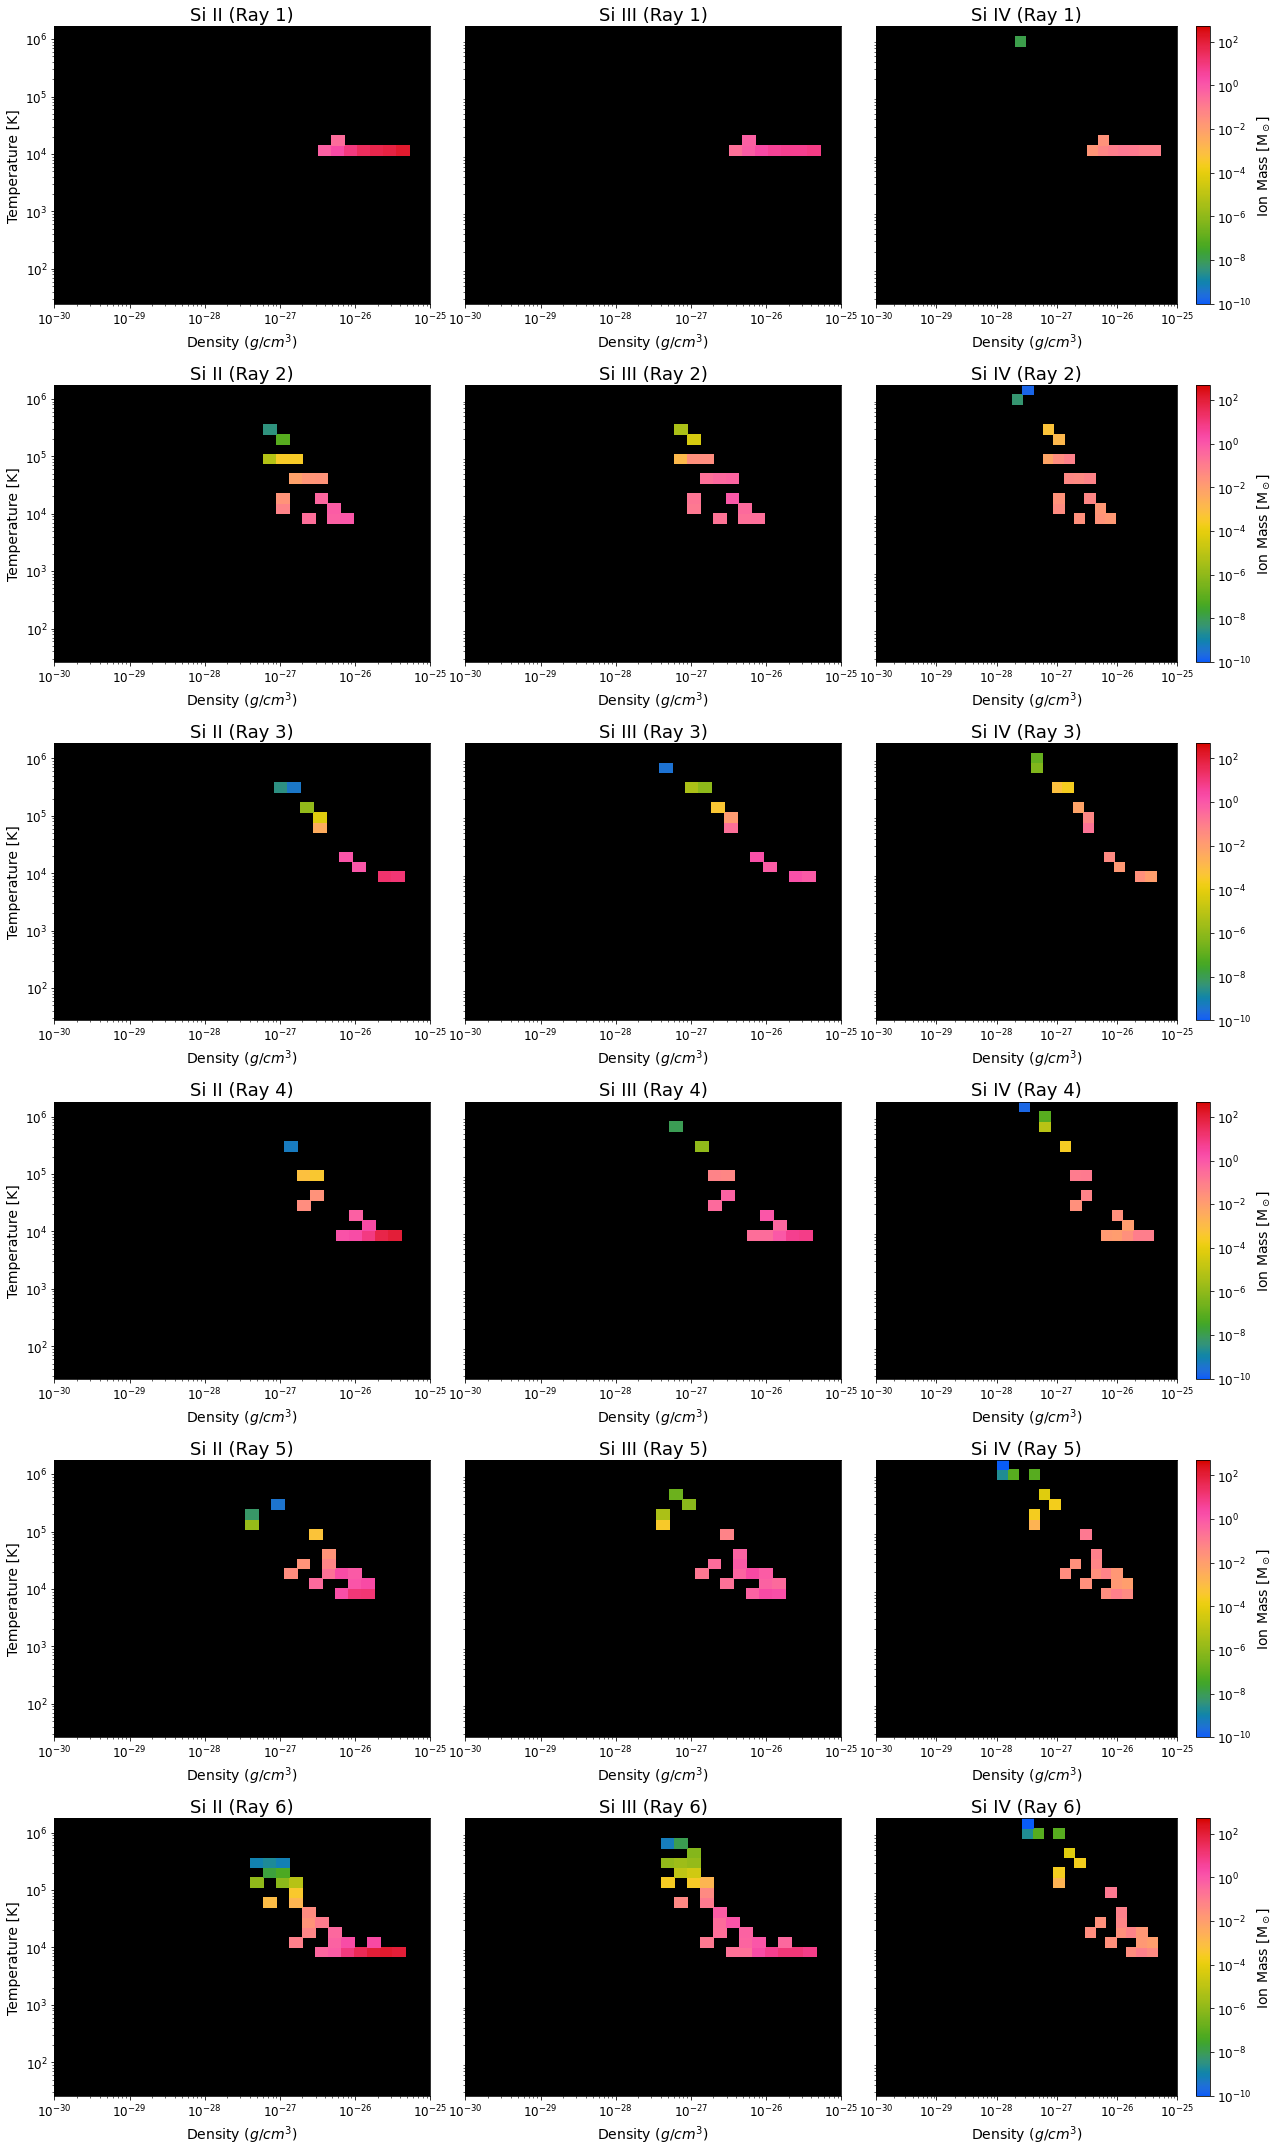

In [32]:
big_plot(xx,yy,Siz,Si_titles,vmin_=10**-10, vmax_=5*10**2)

# C

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  1.090e+03
hist 1 max bin:  4.018e+02
hist 1 min bin:  1.694e+00
 
hist 2 sum:  1.374e+02
hist 2 max bin:  3.624e+01
hist 2 min bin:  1.916e-08
 
hist 3 sum:  6.147e-02
hist 3 max bin:  1.467e-02
hist 3 min bin:  1.385e-07


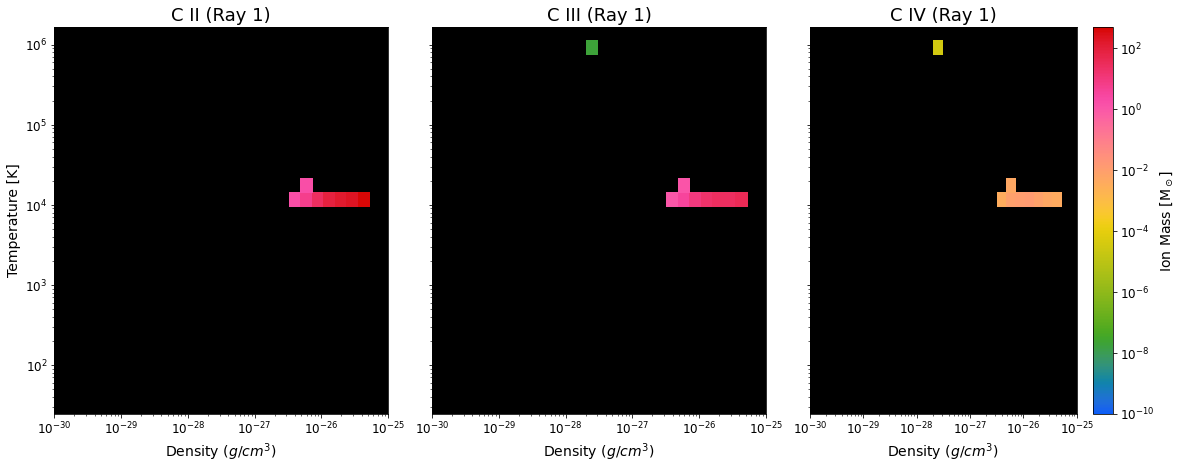

In [33]:
CII1 = np.array(ray1.all_data()['C_p1_mass'])/M
CIII1 = np.array(ray1.all_data()['C_p2_mass'])/M
CIV1 = np.array(ray1.all_data()['C_p3_mass'])/M

plot2(den,temp,[CII1,CIII1,CIV1], ['C II (Ray 1)', 'C III (Ray 1)', 'C IV (Ray 1)'], vmin_=10**-10,vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  2.494e+01
hist 1 max bin:  1.250e+01
hist 1 min bin:  3.402e-03
 
hist 2 sum:  1.515e+01
hist 2 max bin:  3.197e+00
hist 2 min bin:  5.543e-10
 
hist 3 sum:  7.660e-01
hist 3 max bin:  4.331e-01
hist 3 min bin:  7.910e-06


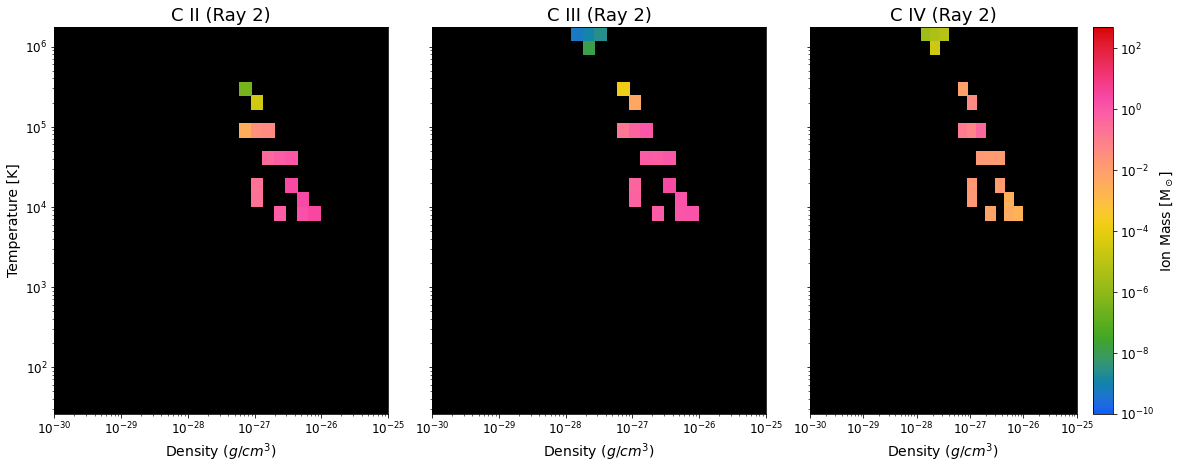

In [34]:
CII2 = np.array(ray2.all_data()['C_p1_mass'])/M
CIII2 = np.array(ray2.all_data()['C_p2_mass'])/M
CIV2 = np.array(ray2.all_data()['C_p3_mass'])/M

plot2(den2,temp2,[CII2,CIII2,CIV2], ['C II (Ray 2)', 'C III (Ray 2)', 'C IV (Ray 2)'], vmin_=10**-10,vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  2.229e+02
hist 1 max bin:  1.218e+02
hist 1 min bin:  2.092e-08
 
hist 2 sum:  2.695e+01
hist 2 max bin:  8.555e+00
hist 2 min bin:  1.452e-09
 
hist 3 sum:  8.525e-01
hist 3 max bin:  5.887e-01
hist 3 min bin:  5.205e-06


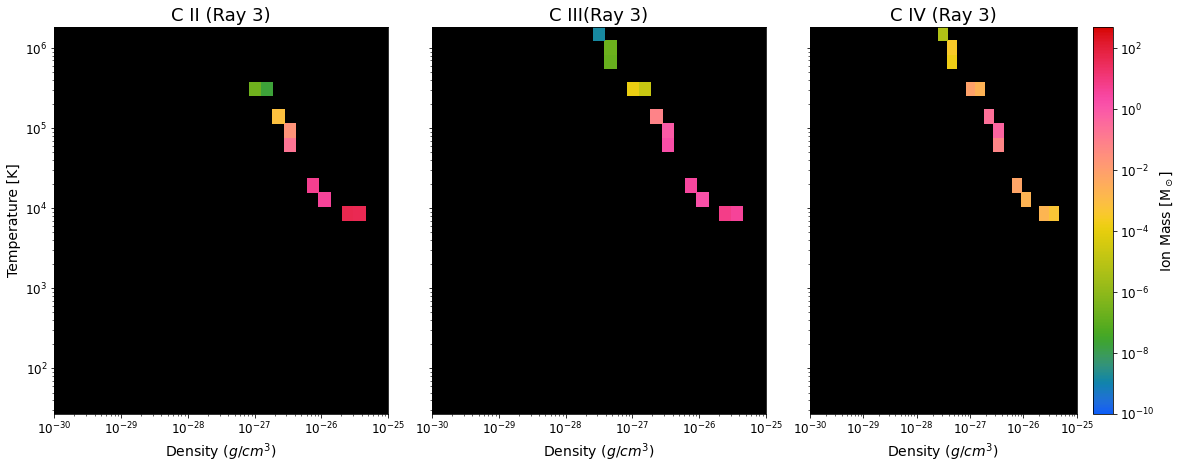

In [35]:
CII3 = np.array(ray3.all_data()['C_p1_mass'])/M
CIII3 = np.array(ray3.all_data()['C_p2_mass'])/M
CIV3 = np.array(ray3.all_data()['C_p3_mass'])/M

plot2(den3,temp3,[CII3,CIII3,CIV3], ['C II (Ray 3)', 'C III(Ray 3)', 'C IV (Ray 3)'], vmin_=10**-10,vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  5.687e+02
hist 1 max bin:  2.982e+02
hist 1 min bin:  2.755e-08
 
hist 2 sum:  7.704e+01
hist 2 max bin:  3.267e+01
hist 2 min bin:  4.880e-10
 
hist 3 sum:  5.129e-01
hist 3 max bin:  3.431e-01
hist 3 min bin:  2.023e-07


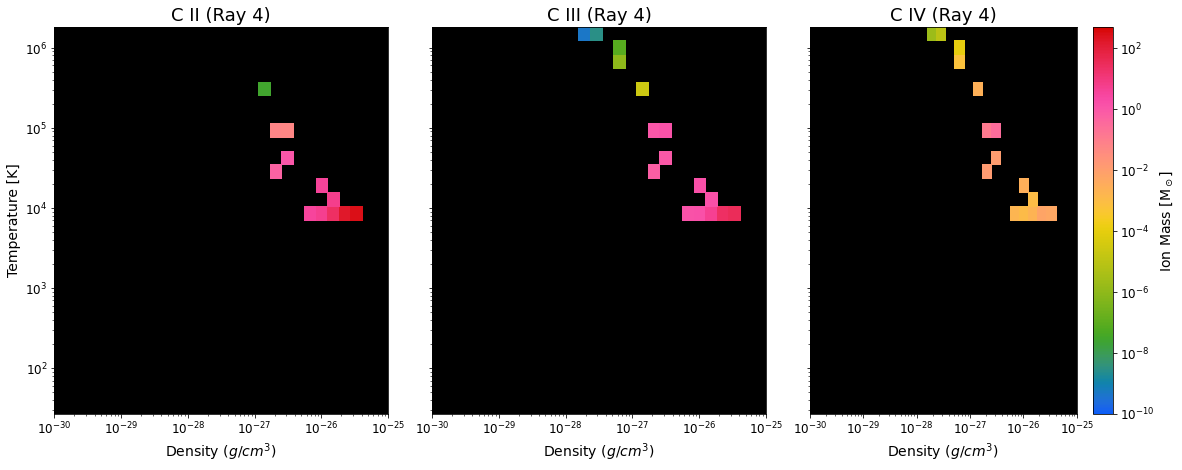

In [36]:
CII4 = np.array(ray4.all_data()['C_p1_mass'])/M
CIII4 = np.array(ray4.all_data()['C_p2_mass'])/M
CIV4 = np.array(ray4.all_data()['C_p3_mass'])/M

plot2(den4,temp4,[CII4,CIII4,CIV4], ['C II (Ray 4)', 'C III (Ray 4)', 'C IV (Ray 4)'], vmin_=10**-10,vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  3.193e+02
hist 1 max bin:  2.129e+02
hist 1 min bin:  3.360e-09
 
hist 2 sum:  7.031e+01
hist 2 max bin:  3.345e+01
hist 2 min bin:  1.828e-10
 
hist 3 sum:  4.144e-01
hist 3 max bin:  2.450e-01
hist 3 min bin:  1.355e-06


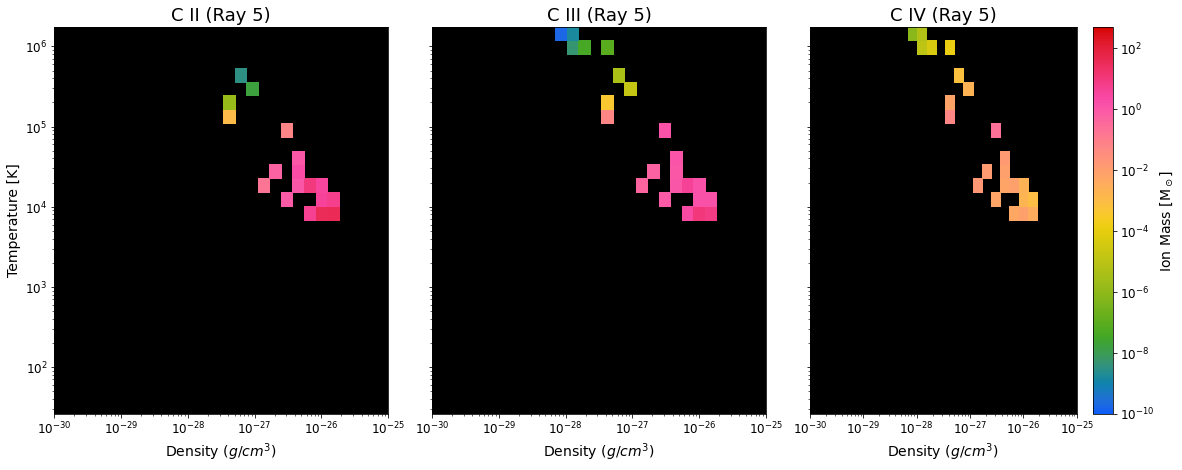

In [37]:
CII5 = np.array(ray5.all_data()['C_p1_mass'])/M
CIII5 = np.array(ray5.all_data()['C_p2_mass'])/M
CIV5 = np.array(ray5.all_data()['C_p3_mass'])/M

plot2(den5,temp5,[CII5,CIII5,CIV5], ['C II (Ray 5)', 'C III (Ray 5)', 'C IV (Ray 5)'], 
      vmin_=10**-10,vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  1.383e+03
hist 1 max bin:  4.199e+02
hist 1 min bin:  5.013e-04
 
hist 2 sum:  2.148e+02
hist 2 max bin:  5.810e+01
hist 2 min bin:  2.537e-10
 
hist 3 sum:  1.292e+00
hist 3 max bin:  7.831e-01
hist 3 min bin:  1.583e-06


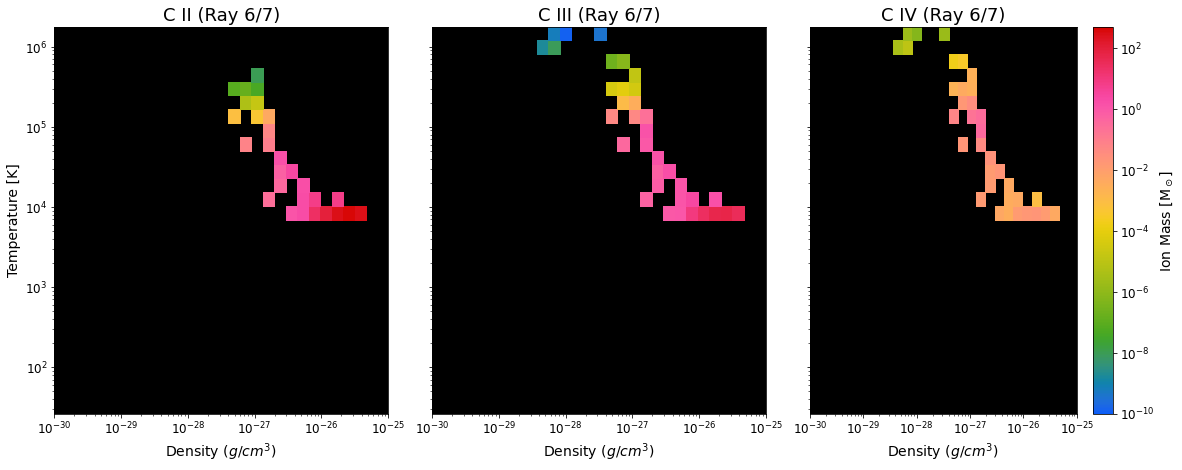

In [38]:
CII7 = np.array(ray7.all_data()['C_p1_mass'])/M
CIII7 = np.array(ray7.all_data()['C_p2_mass'])/M
CIV7 = np.array(ray7.all_data()['C_p3_mass'])/M

plot2(den7,temp7,[CII7,CIII7,CIV7], ['C II (Ray 6/7)', 'C III (Ray 6/7)', 'C IV (Ray 6/7)'],
     vmin_=10**-10,vmax_=5*10**2)

In [39]:
Cz = [CII1, CIII1, CIV1,CII2, CIII2, CIV2,CII3, CIII3, CIV3,
     CII4, CIII4, CIV4,CII5, CIII5, CIV5, CII7, CIII7, CIV7]
C_titles = name(['C II', 'C III', 'C IV'])

<ipython-input-4-eb5abf27fbb0>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:57: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:79: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

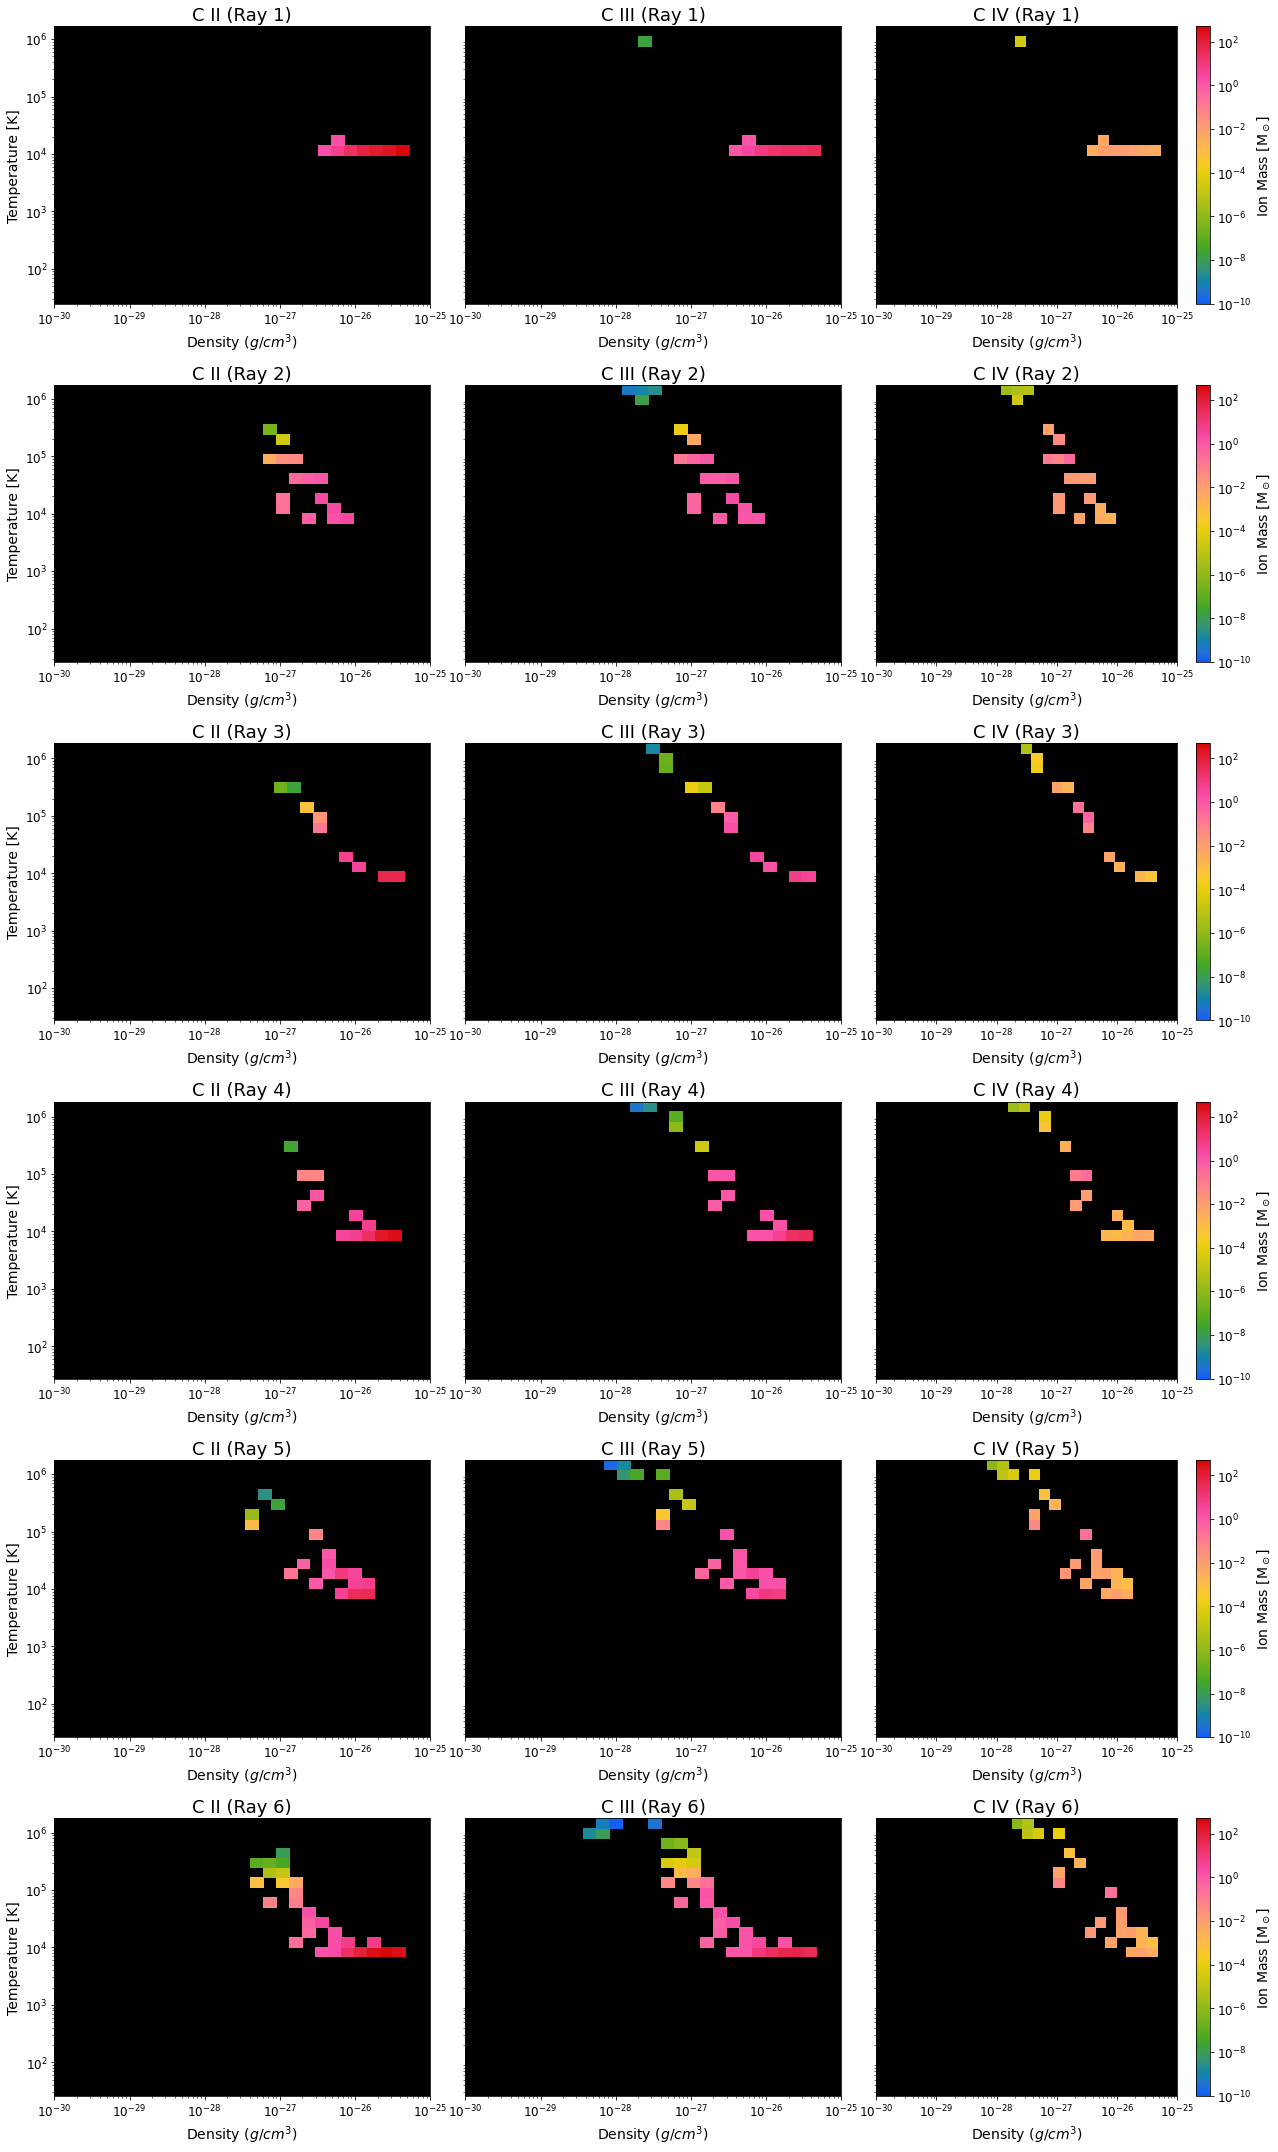

In [40]:
big_plot(xx,yy,Cz,C_titles,vmin_=10**-10,vmax_=5*10**2)

# O

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  7.995e+02
hist 1 max bin:  3.269e+02
hist 1 min bin:  3.306e-01
 
hist 2 sum:  2.557e+03
hist 2 max bin:  8.824e+02
hist 2 min bin:  6.427e+00
 
hist 3 sum:  1.960e+01
hist 3 max bin:  4.284e+00
hist 3 min bin:  5.181e-01


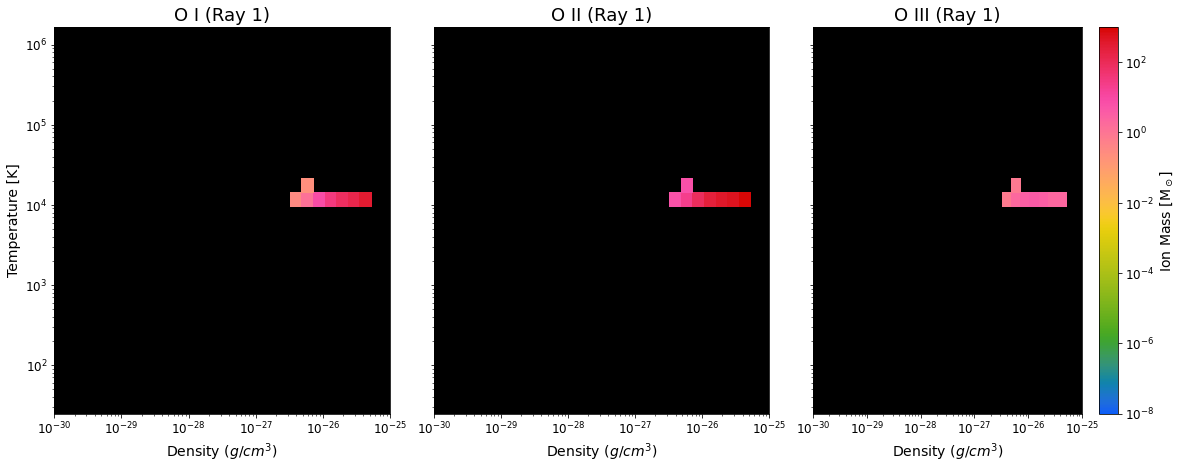

In [41]:
OI1 = np.array(ray1.all_data()['O_p0_mass'])/M
OII1 = np.array(ray1.all_data()['O_p1_mass'])/M
OIII1 = np.array(ray1.all_data()['O_p2_mass'])/M

plot2(den,temp,[OI1,OII1,OIII1], ['O I (Ray 1)', 'O II (Ray 1)', 'O III (Ray 1)'], vmin_=10**-8,vmax_=10**3)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  6.886e+00
hist 1 max bin:  4.969e+00
hist 1 min bin:  9.421e-06
 
hist 2 sum:  8.057e+01
hist 2 max bin:  3.652e+01
hist 2 min bin:  2.292e-02
 
hist 3 sum:  2.001e+01
hist 3 max bin:  5.146e+00
hist 3 min bin:  5.537e-01


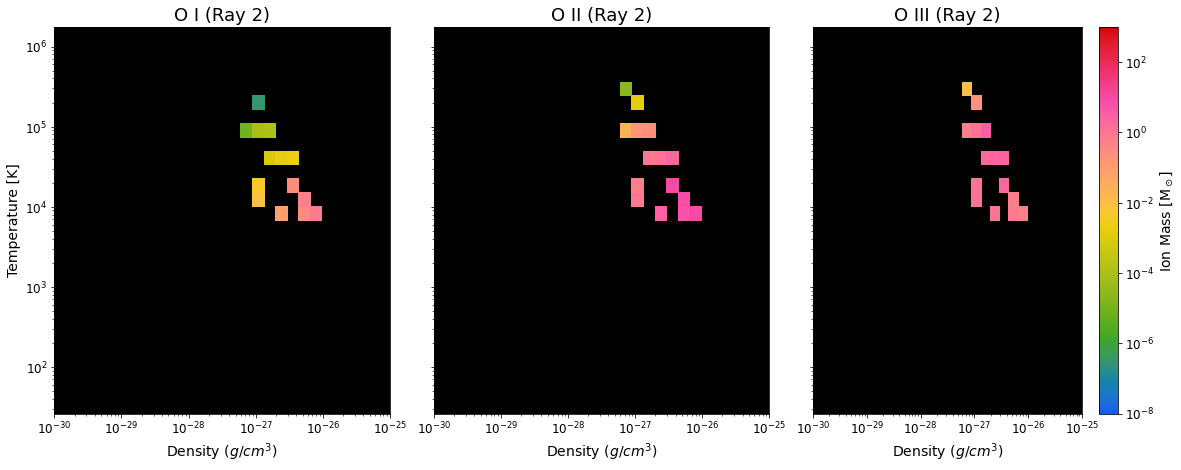

In [42]:
OI2 = np.array(ray2.all_data()['O_p0_mass'])/M
OII2 = np.array(ray2.all_data()['O_p1_mass'])/M
OIII2 = np.array(ray2.all_data()['O_p2_mass'])/M

plot2(den2,temp2,[OI2,OII2,OIII2], ['O I (Ray 2)', 'O II (Ray 2)', 'O III (Ray 2)'], vmin_=10**-8,vmax_=10**3)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  1.798e+02
hist 1 max bin:  1.164e+02
hist 1 min bin:  3.915e-06
 
hist 2 sum:  5.008e+02
hist 2 max bin:  2.472e+02
hist 2 min bin:  2.956e-07
 
hist 3 sum:  1.080e+01
hist 3 max bin:  6.762e+00
hist 3 min bin:  2.186e-04


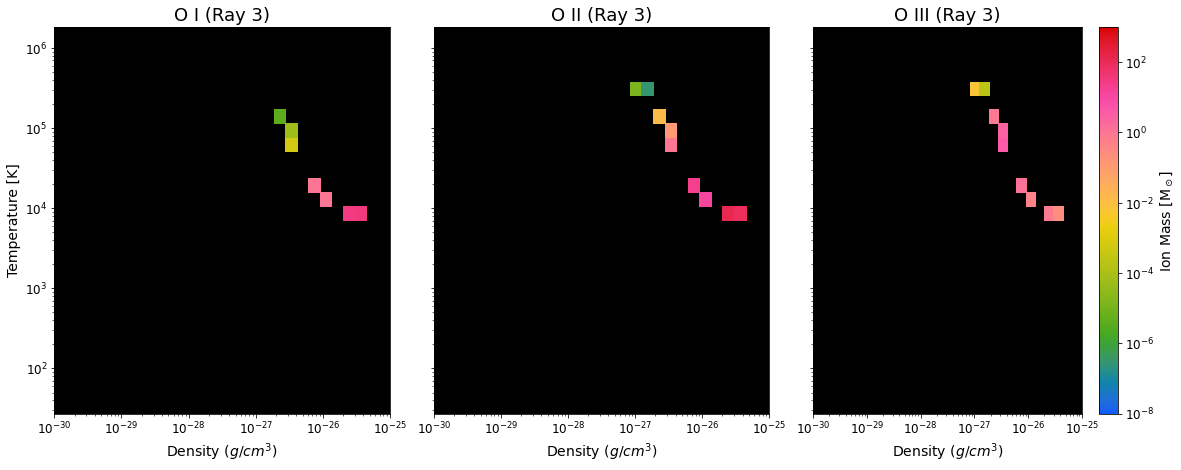

In [43]:
OI3 = np.array(ray3.all_data()['O_p0_mass'])/M
OII3 = np.array(ray3.all_data()['O_p1_mass'])/M
OIII3 = np.array(ray3.all_data()['O_p2_mass'])/M

plot2(den3,temp3,[OI3,OII3,OIII3], ['O I (Ray 3)', 'O II (Ray 3)', 'O III (Ray 3)'], vmin_=10**-8,vmax_=10**3)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  3.797e+02
hist 1 max bin:  2.126e+02
hist 1 min bin:  3.320e-03
 
hist 2 sum:  1.369e+03
hist 2 max bin:  6.937e+02
hist 2 min bin:  4.941e-07
 
hist 3 sum:  1.906e+01
hist 3 max bin:  6.526e+00
hist 3 min bin:  5.366e-08


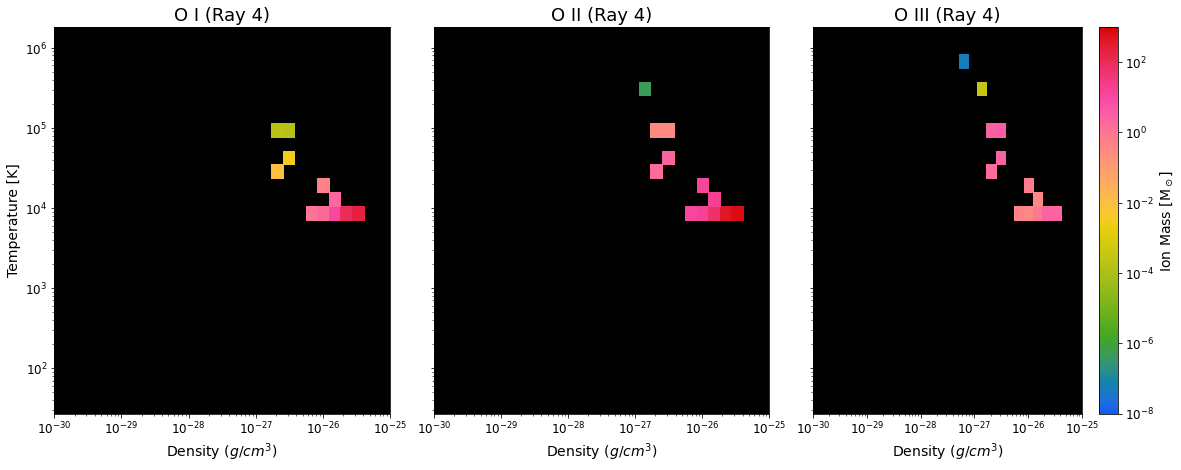

In [44]:
OI4 = np.array(ray4.all_data()['O_p0_mass'])/M
OII4 = np.array(ray4.all_data()['O_p1_mass'])/M
OIII4 = np.array(ray4.all_data()['O_p2_mass'])/M

plot2(den4,temp4,[OI4,OII4,OIII4], ['O I (Ray 4)', 'O II (Ray 4)', 'O III (Ray 4)'], vmin_=10**-8,vmax_=10**3)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  1.550e+02
hist 1 max bin:  1.185e+02
hist 1 min bin:  3.522e-06
 
hist 2 sum:  8.738e+02
hist 2 max bin:  5.479e+02
hist 2 min bin:  1.476e-08
 
hist 3 sum:  2.671e+01
hist 3 max bin:  6.450e+00
hist 3 min bin:  1.443e-05


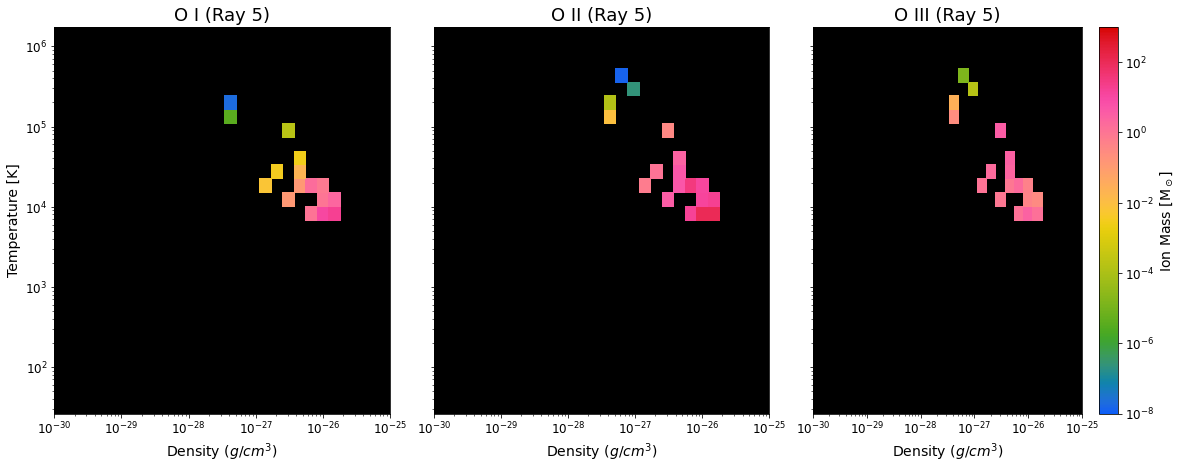

In [45]:
OI5 = np.array(ray5.all_data()['O_p0_mass'])/M
OII5 = np.array(ray5.all_data()['O_p1_mass'])/M
OIII5 = np.array(ray5.all_data()['O_p2_mass'])/M

plot2(den5,temp5,[OI5,OII5,OIII5], ['O I (Ray 5)', 'O II (Ray 5)', 'O III (Ray 5)'], vmin_=10**-8,vmax_=10**3)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  8.693e+02
hist 1 max bin:  2.554e+02
hist 1 min bin:  2.830e-06
 
hist 2 sum:  3.444e+03
hist 2 max bin:  1.043e+03
hist 2 min bin:  7.683e-03
 
hist 3 sum:  5.352e+01
hist 3 max bin:  8.485e+00
hist 3 min bin:  2.699e-01


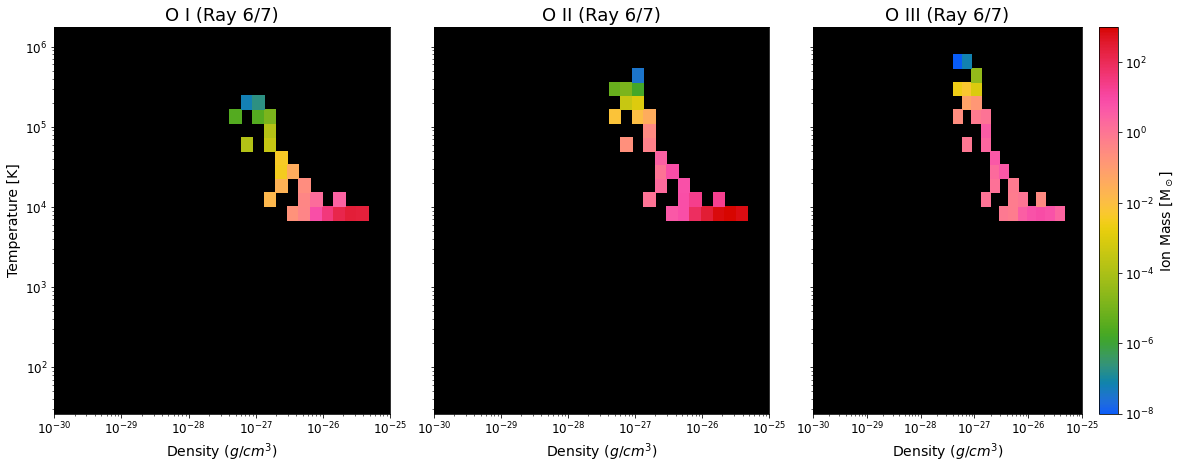

In [46]:
OI7 = np.array(ray7.all_data()['O_p0_mass'])/M
OII7 = np.array(ray7.all_data()['O_p1_mass'])/M
OIII7 = np.array(ray7.all_data()['O_p2_mass'])/M

plot2(den7,temp7,[OI7,OII7,OIII7], ['O I (Ray 6/7)', 'O II (Ray 6/7)', 'O III (Ray 6/7)'], 
     vmin_=10**-8,vmax_=10**3)

In [47]:
Oz = [OI1, OII1, OIII1, OI2, OII2, OIII2, OI3, OII3, OIII3,
     OI4, OII4, OIII4, OI5, OII5, OIII5, OI7, OII7, OIII7]
O_titles = name(['O I', "O II", 'O III'])

<ipython-input-4-eb5abf27fbb0>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:57: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:79: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

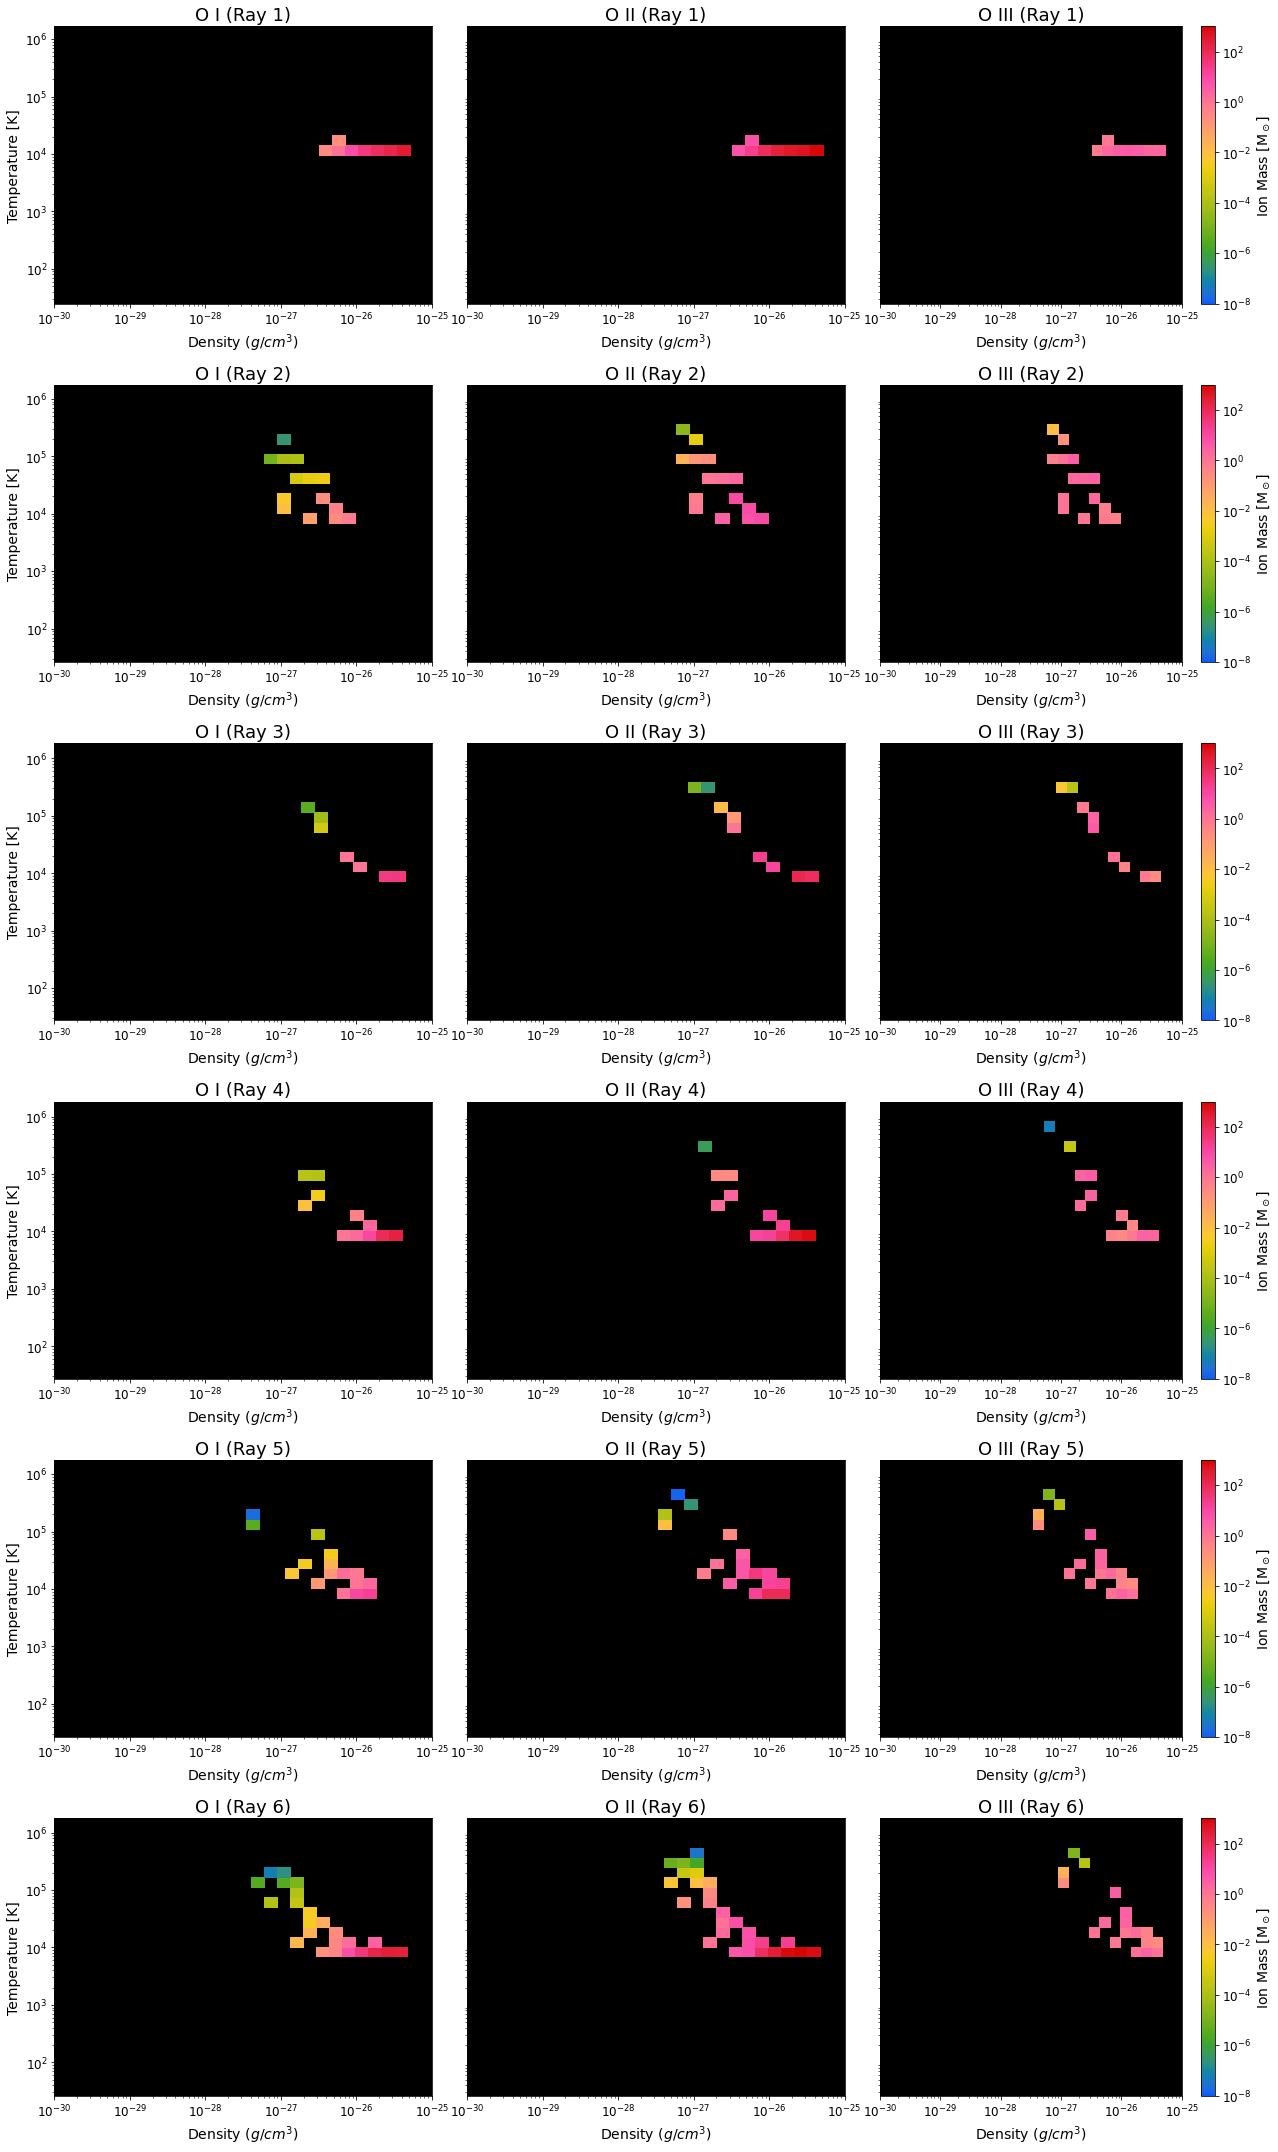

In [48]:
big_plot(xx,yy,Oz,O_titles, vmin_=10**-8,vmax_=10**3)

# Al

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  3.025e+01
hist 1 max bin:  1.123e+01
hist 1 min bin:  4.255e-02
 
hist 2 sum:  1.494e+00
hist 2 max bin:  4.096e-01
hist 2 min bin:  1.093e-02
 
hist 3 sum:  2.526e+00
hist 3 max bin:  6.586e-01
hist 3 min bin:  3.525e-09


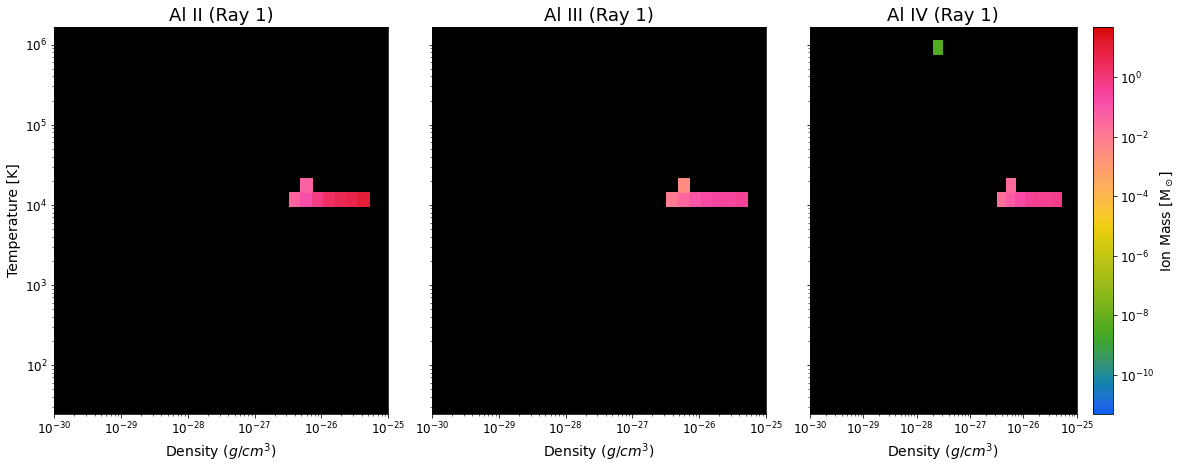

In [49]:
AlII1 = np.array(ray1.all_data()['Al_p1_mass'])/M
AlIII1 = np.array(ray1.all_data()['Al_p2_mass'])/M
AlIV1 = np.array(ray1.all_data()['Al_p3_mass'])/M

plot2(den,temp,[AlII1,AlIII1,AlIV1], ['Al II (Ray 1)', 'Al III (Ray 1)', 'Al IV (Ray 1)'], vmin_=5*10**-12, vmax_=5*10**1)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  6.132e-01
hist 1 max bin:  3.367e-01
hist 1 min bin:  1.365e-07
 
hist 2 sum:  1.003e-01
hist 2 max bin:  3.318e-02
hist 2 min bin:  1.267e-05
 
hist 3 sum:  3.644e-01
hist 3 max bin:  8.525e-02
hist 3 min bin:  2.792e-11


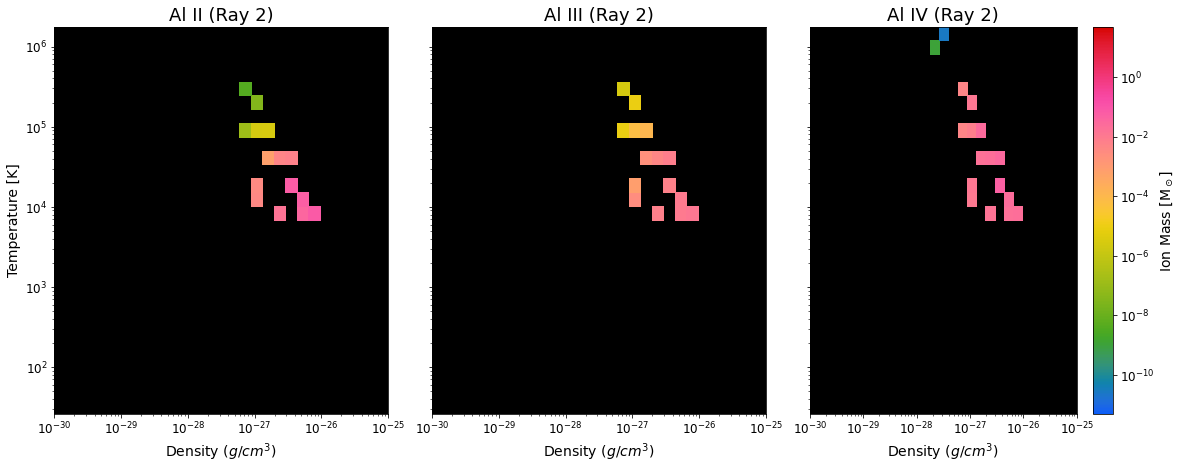

In [50]:
AlII2 = np.array(ray2.all_data()['Al_p1_mass'])/M
AlIII2 = np.array(ray2.all_data()['Al_p2_mass'])/M
AlIV2 = np.array(ray2.all_data()['Al_p3_mass'])/M

plot2(den2,temp2,[AlII2,AlIII2,AlIV2], ['Al II (Ray 2)', 'Al III (Ray 2)', 'Al IV (Ray 2)'], vmin_=5*10**-12, vmax_=5*10**1)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  6.235e+00
hist 1 max bin:  3.442e+00
hist 1 min bin:  3.979e-10
 
hist 2 sum:  2.382e-01
hist 2 max bin:  9.882e-02
hist 2 min bin:  4.658e-11
 
hist 3 sum:  5.702e-01
hist 3 max bin:  1.572e-01
hist 3 min bin:  8.535e-12


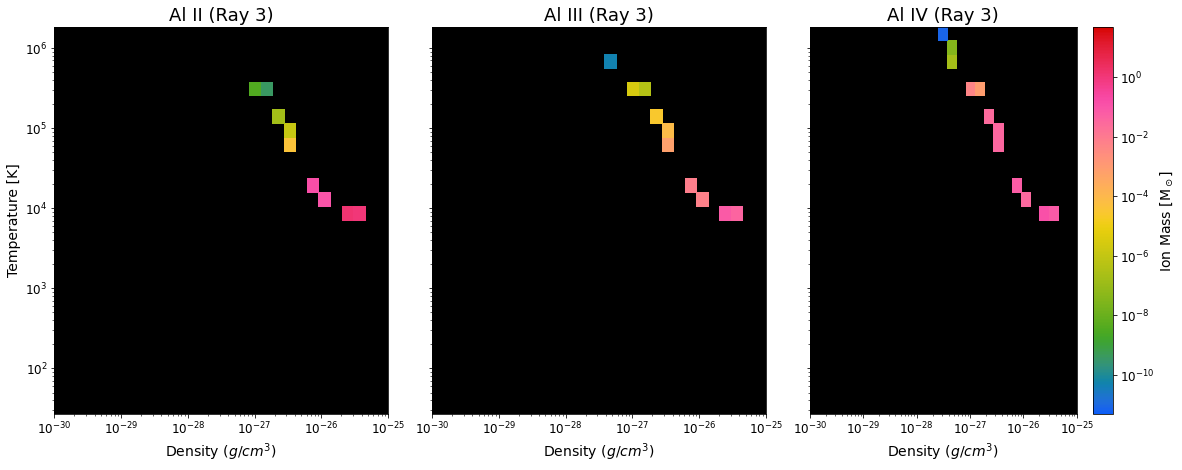

In [51]:
AlII3 = np.array(ray3.all_data()['Al_p1_mass'])/M
AlIII3 = np.array(ray3.all_data()['Al_p2_mass'])/M
AlIV3 = np.array(ray3.all_data()['Al_p3_mass'])/M

plot2(den3,temp3,[AlII3,AlIII3,AlIV3], ['Al II (Ray 3)', 'Al III (Ray 3)', 'Al IV (Ray 3)'],vmin_=5*10**-12, vmax_=5*10**1)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  1.569e+01
hist 1 max bin:  8.269e+00
hist 1 min bin:  5.270e-10
 
hist 2 sum:  7.980e-01
hist 2 max bin:  3.642e-01
hist 2 min bin:  2.184e-09
 
hist 3 sum:  1.452e+00
hist 3 max bin:  5.913e-01
hist 3 min bin:  3.228e-11


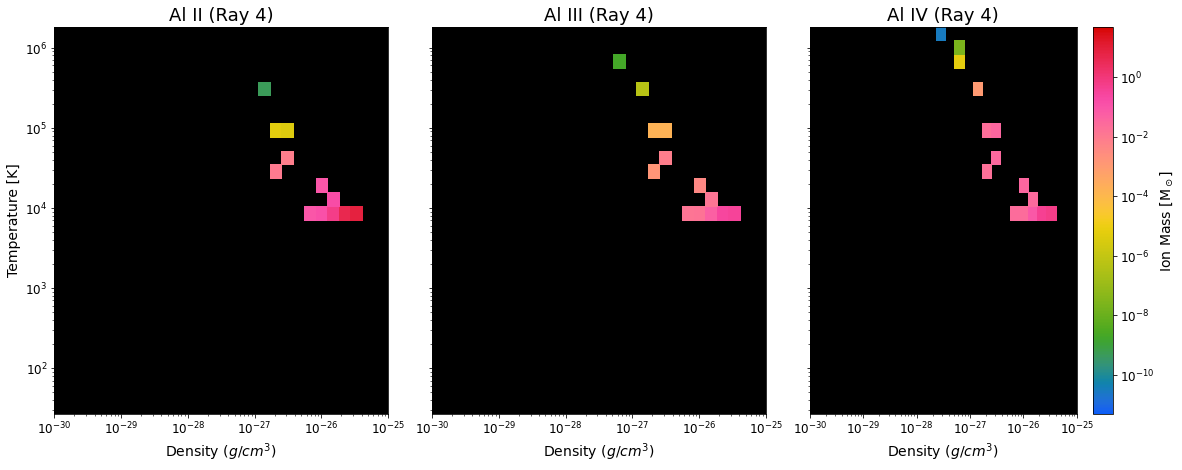

In [52]:
AlII4 = np.array(ray4.all_data()['Al_p1_mass'])/M
AlIII4 = np.array(ray4.all_data()['Al_p2_mass'])/M
AlIV4 = np.array(ray4.all_data()['Al_p3_mass'])/M

plot2(den4,temp4,[AlII4,AlIII4,AlIV4], ['Al II (Ray 4)', 'Al III (Ray 4)', 'Al IV (Ray 4)'], vmin_=5*10**-12, vmax_=5*10**1)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  8.652e+00
hist 1 max bin:  5.834e+00
hist 1 min bin:  5.451e-11
 
hist 2 sum:  6.625e-01
hist 2 max bin:  3.646e-01
hist 2 min bin:  5.656e-12
 
hist 3 sum:  1.383e+00
hist 3 max bin:  6.065e-01
hist 3 min bin:  5.034e-10


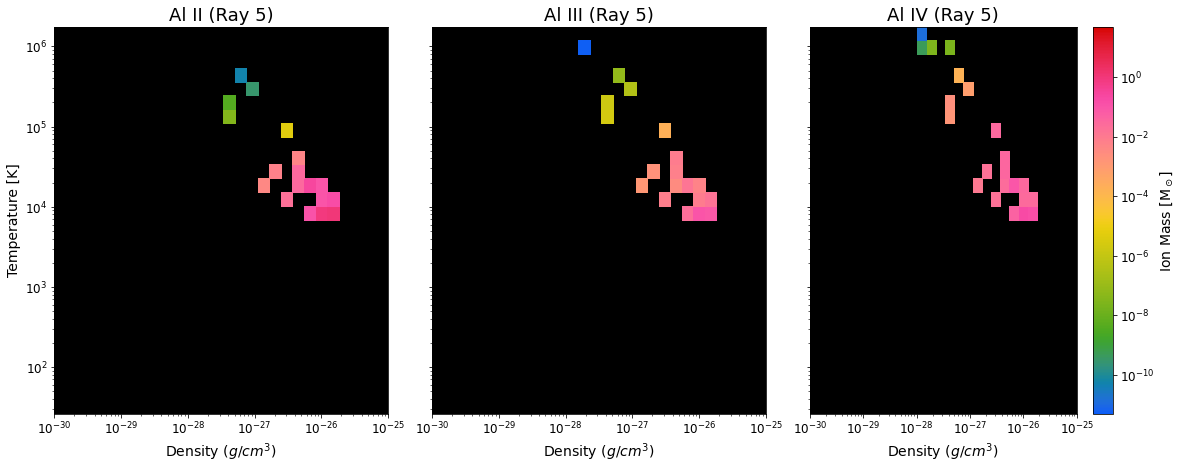

In [53]:
AlII5 = np.array(ray5.all_data()['Al_p1_mass'])/M
AlIII5 = np.array(ray5.all_data()['Al_p2_mass'])/M
AlIV5 = np.array(ray5.all_data()['Al_p3_mass'])/M

plot2(den5,temp5,[AlII5,AlIII5,AlIV5], ['Al II (Ray 5)', 'Al III (Ray 5)', 'Al IV (Ray 5)'], 
      vmin_=5*10**-12, vmax_=5*10**1)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  3.800e+01
hist 1 max bin:  1.155e+01
hist 1 min bin:  3.255e-08
 
hist 2 sum:  2.248e+00
hist 2 max bin:  6.380e-01
hist 2 min bin:  1.751e-12
 
hist 3 sum:  4.079e+00
hist 3 max bin:  1.051e+00
hist 3 min bin:  1.704e-10


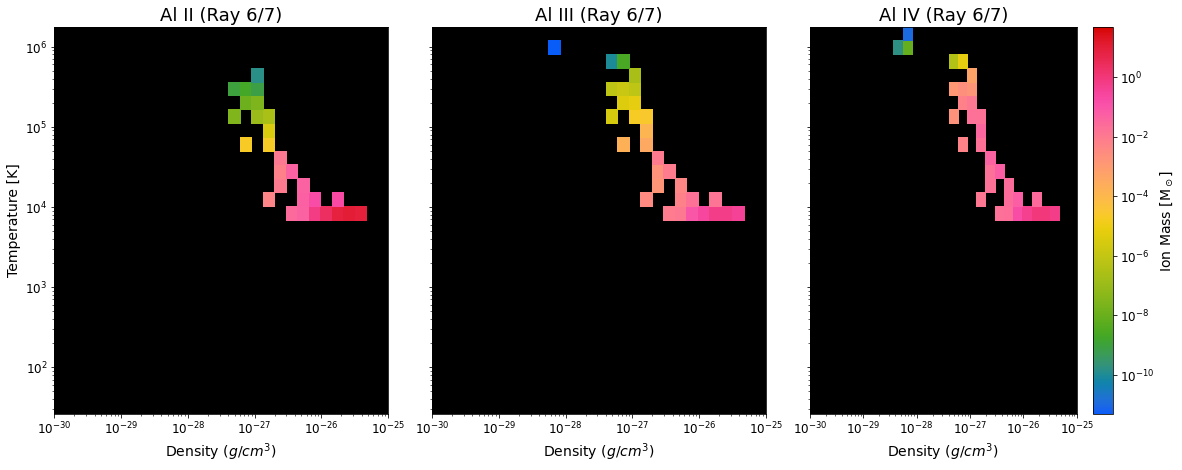

In [54]:
AlII7 = np.array(ray7.all_data()['Al_p1_mass'])/M
AlIII7 = np.array(ray7.all_data()['Al_p2_mass'])/M
AlIV7 = np.array(ray7.all_data()['Al_p3_mass'])/M

plot2(den7,temp7,[AlII7,AlIII7,AlIV7], ['Al II (Ray 6/7)', 'Al III (Ray 6/7)', 'Al IV (Ray 6/7)'],
     vmin_=5*10**-12, vmax_=5*10**1)

In [55]:
Alz = [AlII1, AlIII1, AlIV1, AlII2, AlIII2, AlIV2, AlII3, AlIII3, AlIV3,
      AlII4, AlIII4, AlIV4, AlII5, AlIII5, AlIV5, AlII7, AlIII7, AlIV7]
Al_titles = name(['Al II', 'Al III', 'Al IV'])

<ipython-input-4-eb5abf27fbb0>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:57: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:79: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

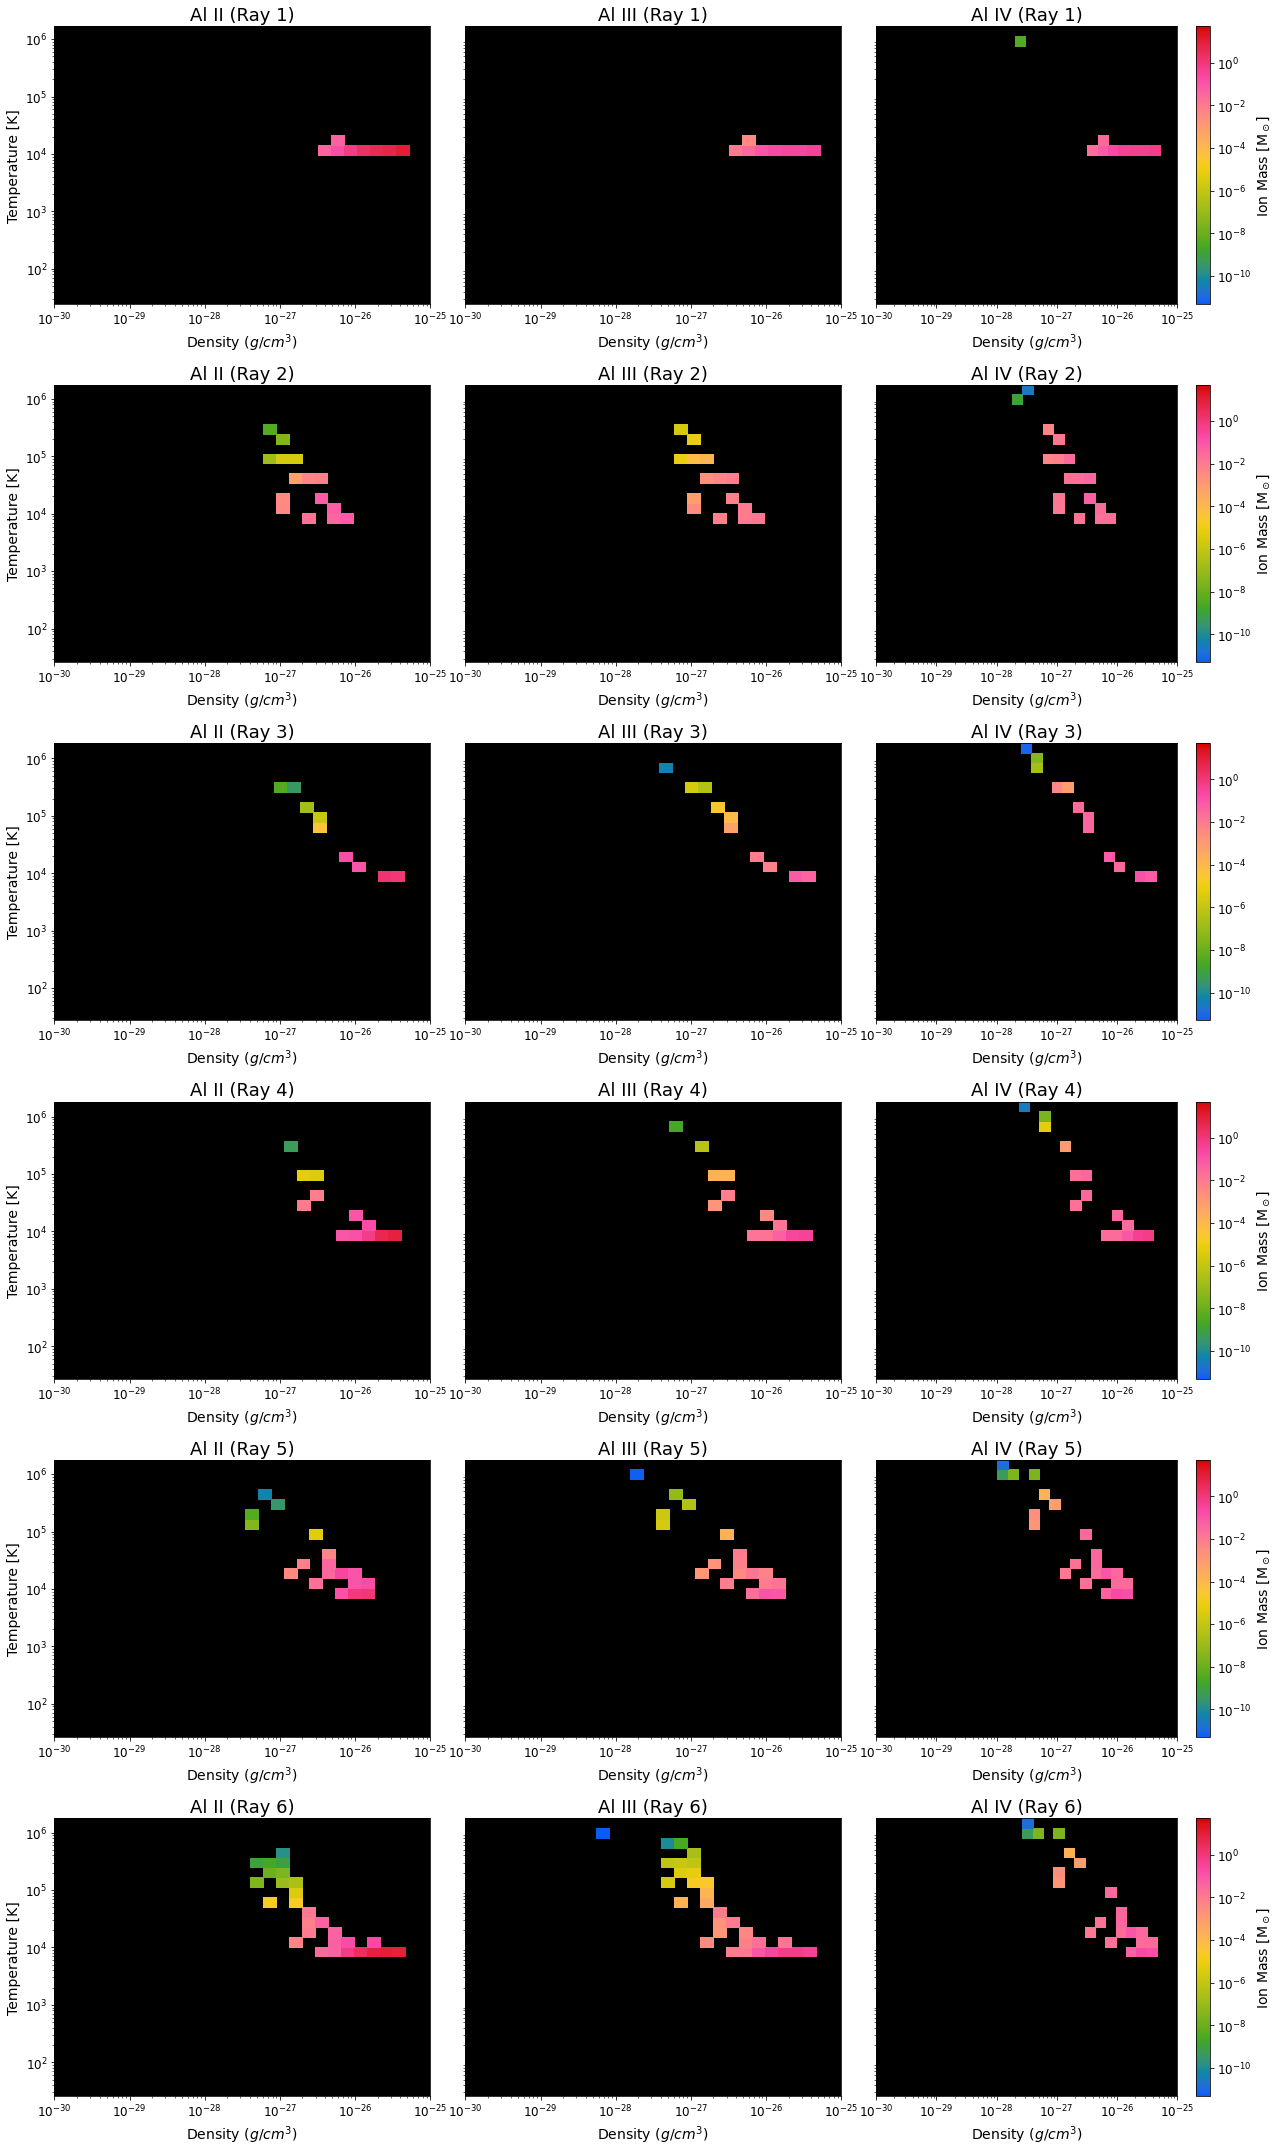

In [56]:
big_plot(xx, yy, Alz, Al_titles, vmin_=5*10**-12, vmax_=5*10**1)

# Fe

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  4.931e+02
hist 1 max bin:  1.899e+02
hist 1 min bin:  4.581e-01
 
hist 2 sum:  1.835e+02
hist 2 max bin:  5.317e+01
hist 2 min bin:  9.871e-01
 
hist 3 sum:  1.087e+00
hist 3 max bin:  2.415e-01
hist 3 min bin:  1.316e-10


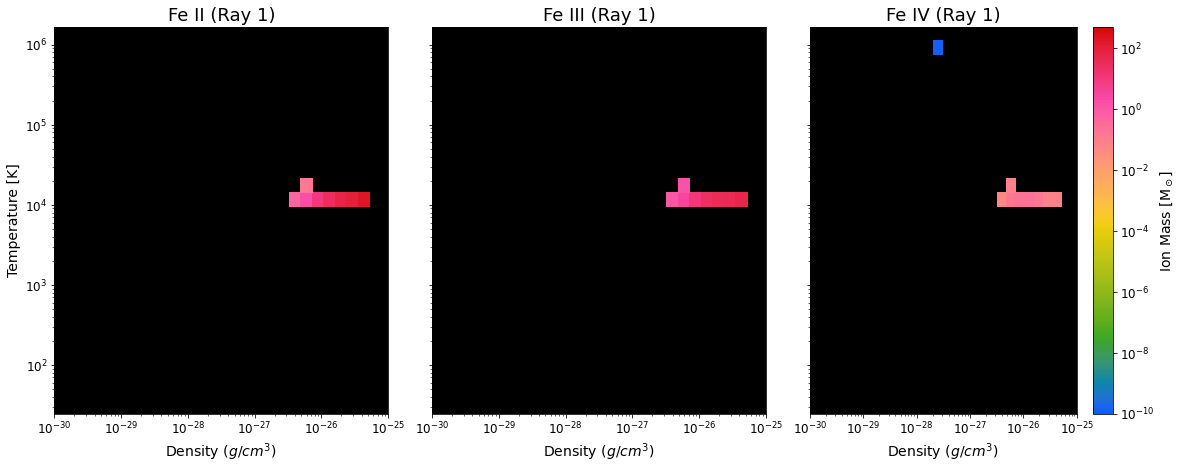

In [57]:
FeII1 = np.array(ray1.all_data()['Fe_p1_mass'])/M
FeIII1 = np.array(ray1.all_data()['Fe_p2_mass'])/M
FeIV1 = np.array(ray1.all_data()['Fe_p3_mass'])/M

plot2(den,temp,[FeII1,FeIII1,FeIV1], ['Fe II (Ray 1)', 'Fe III (Ray 1)', 'Fe IV (Ray 1)'], 
      vmin_=10**-10, vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  6.960e+00
hist 1 max bin:  4.737e+00
hist 1 min bin:  3.004e-05
 
hist 2 sum:  1.147e+01
hist 2 max bin:  3.677e+00
hist 2 min bin:  7.878e-03
 
hist 3 sum:  2.831e+00
hist 3 max bin:  8.767e-01
hist 3 min bin:  3.511e-02


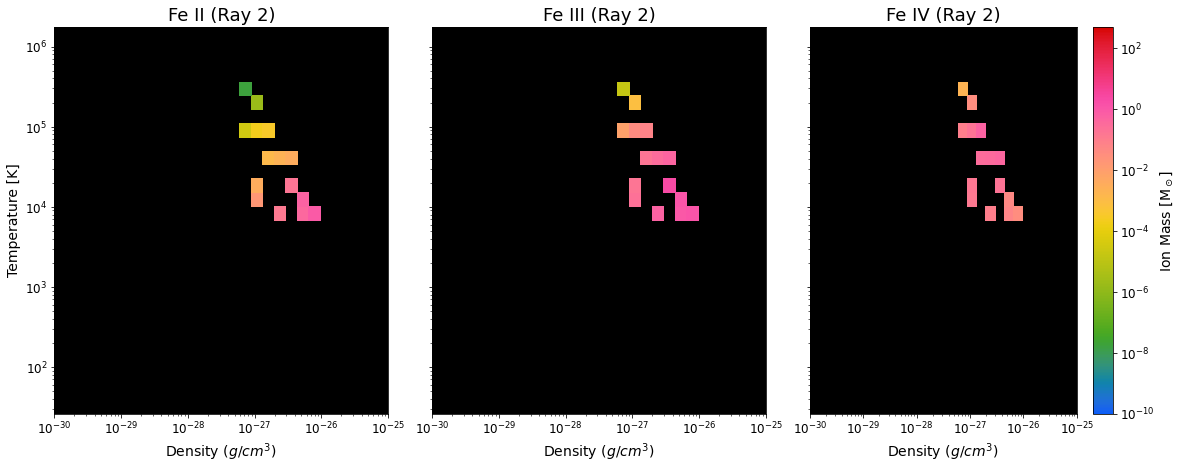

In [58]:
FeII2 = np.array(ray2.all_data()['Fe_p1_mass'])/M
FeIII2 = np.array(ray2.all_data()['Fe_p2_mass'])/M
FeIV2 = np.array(ray2.all_data()['Fe_p3_mass'])/M

plot2(den2,temp2,[FeII2,FeIII2,FeIV2], ['Fe II (Ray 2)', 'Fe III (Ray 2)', 'Fe IV (Ray 2)'], 
      vmin_=10**-10, vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  1.020e+02
hist 1 max bin:  5.996e+01
hist 1 min bin:  1.079e-08
 
hist 2 sum:  3.517e+01
hist 2 max bin:  1.316e+01
hist 2 min bin:  7.792e-07
 
hist 3 sum:  1.613e+00
hist 3 max bin:  1.209e+00
hist 3 min bin:  9.607e-09


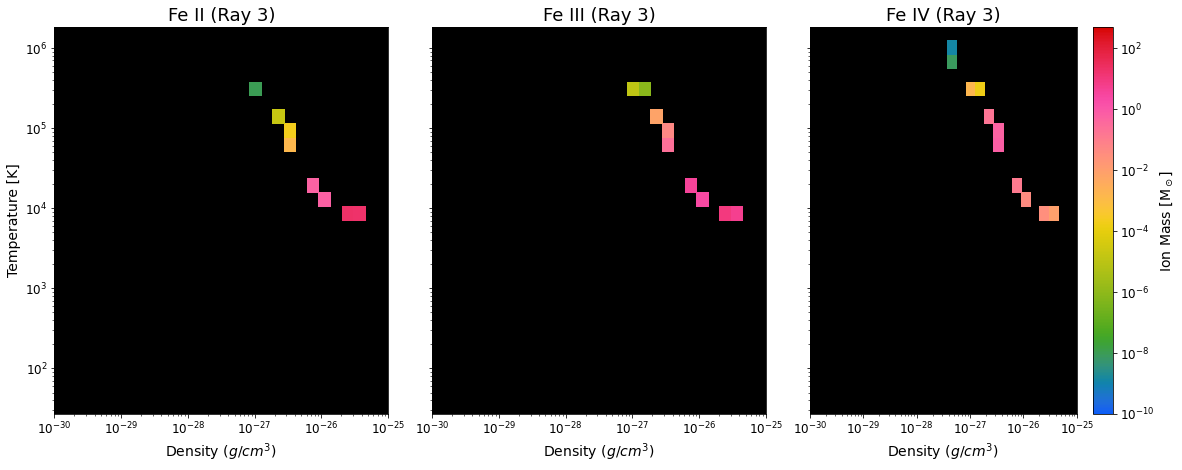

In [59]:
FeII3 = np.array(ray3.all_data()['Fe_p1_mass'])/M
FeIII3 = np.array(ray3.all_data()['Fe_p2_mass'])/M
FeIV3 = np.array(ray3.all_data()['Fe_p3_mass'])/M

plot2(den3,temp3,[FeII3,FeIII3,FeIV3], ['Fe II (Ray 3)', 'Fe III (Ray 3)', 'Fe IV (Ray 3)'], 
      vmin_=10**-10, vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  2.516e+02
hist 1 max bin:  1.361e+02
hist 1 min bin:  7.861e-10
 
hist 2 sum:  1.009e+02
hist 2 max bin:  4.617e+01
hist 2 min bin:  5.840e-10
 
hist 3 sum:  2.232e+00
hist 3 max bin:  1.134e+00
hist 3 min bin:  3.854e-07


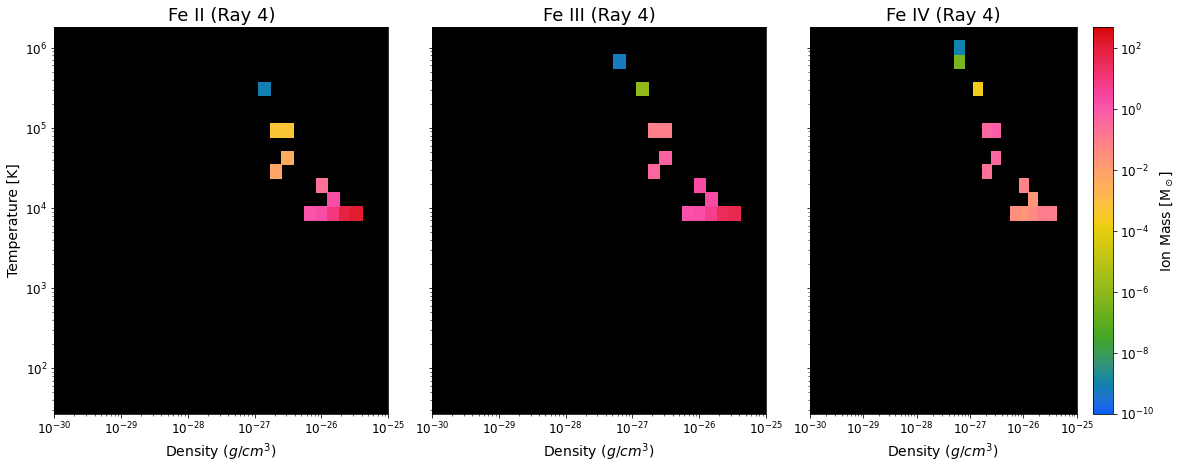

In [60]:
FeII4 = np.array(ray4.all_data()['Fe_p1_mass'])/M
FeIII4 = np.array(ray4.all_data()['Fe_p2_mass'])/M
FeIV4 = np.array(ray4.all_data()['Fe_p3_mass'])/M

plot2(den4,temp4,[FeII4,FeIII4,FeIV4], ['Fe II (Ray 4)', 'Fe III (Ray 4)', 'Fe IV (Ray 4)'], 
      vmin_=10**-10, vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  1.243e+02
hist 1 max bin:  9.048e+01
hist 1 min bin:  9.664e-06
 
hist 2 sum:  8.433e+01
hist 2 max bin:  4.384e+01
hist 2 min bin:  8.545e-08
 
hist 3 sum:  2.933e+00
hist 3 max bin:  9.663e-01
hist 3 min bin:  1.086e-09


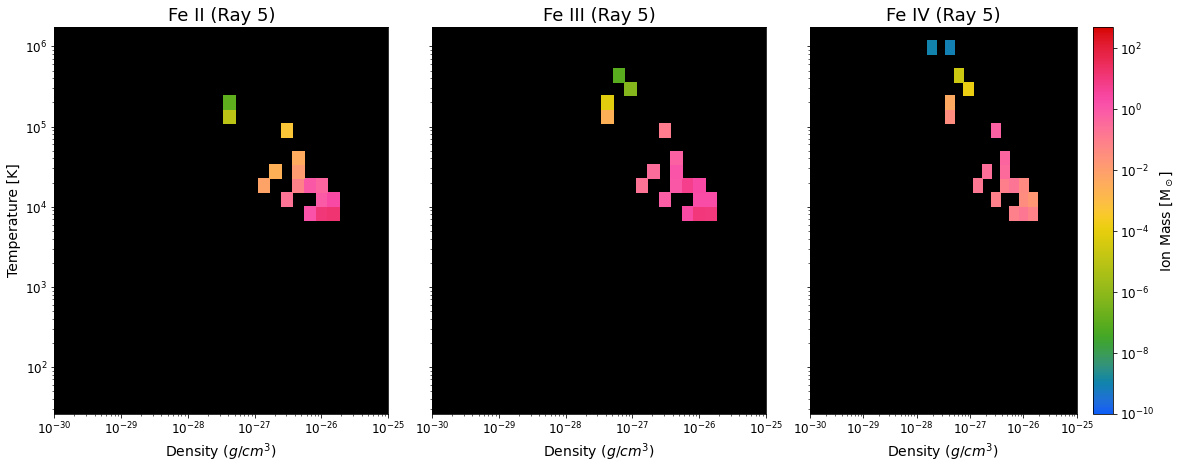

In [61]:
FeII5 = np.array(ray5.all_data()['Fe_p1_mass'])/M
FeIII5 = np.array(ray5.all_data()['Fe_p2_mass'])/M
FeIV5 = np.array(ray5.all_data()['Fe_p3_mass'])/M

plot2(den5,temp5,[FeII5,FeIII5,FeIV5], ['Fe II (Ray 5)', 'Fe III (Ray 5)', 'Fe IV (Ray 5)'], 
      vmin_=10**-10, vmax_=5*10**2)

<ipython-input-3-553b29072bbd>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

hist 1 sum:  5.981e+02
hist 1 max bin:  1.832e+02
hist 1 min bin:  8.706e-06
 
hist 2 sum:  2.726e+02
hist 2 max bin:  7.825e+01
hist 2 min bin:  2.518e-03
 
hist 3 sum:  5.213e+00
hist 3 max bin:  1.406e+00
hist 3 min bin:  3.702e-10


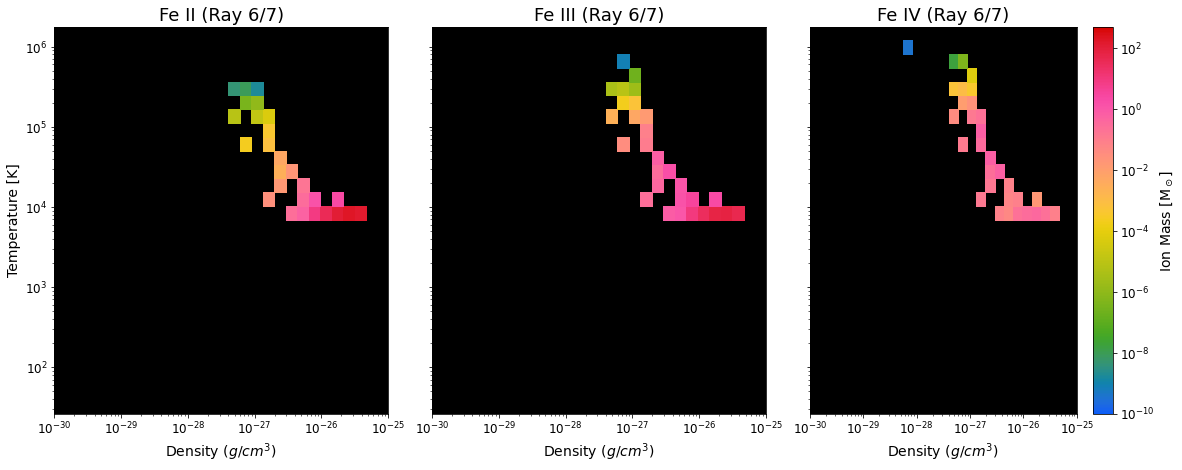

In [62]:
FeII7 = np.array(ray7.all_data()['Fe_p1_mass'])/M
FeIII7 = np.array(ray7.all_data()['Fe_p2_mass'])/M
FeIV7 = np.array(ray7.all_data()['Fe_p3_mass'])/M

plot2(den7,temp7,[FeII7,FeIII7,FeIV7], ['Fe II (Ray 6/7)', 'Fe III (Ray 6/7)', 'Fe IV (Ray 6/7)'],
     vmin_=10**-10, vmax_=5*10**2)

<ipython-input-4-eb5abf27fbb0>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:57: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:79: MatplotlibDeprecationWarning: shading='flat' when X and Y have th

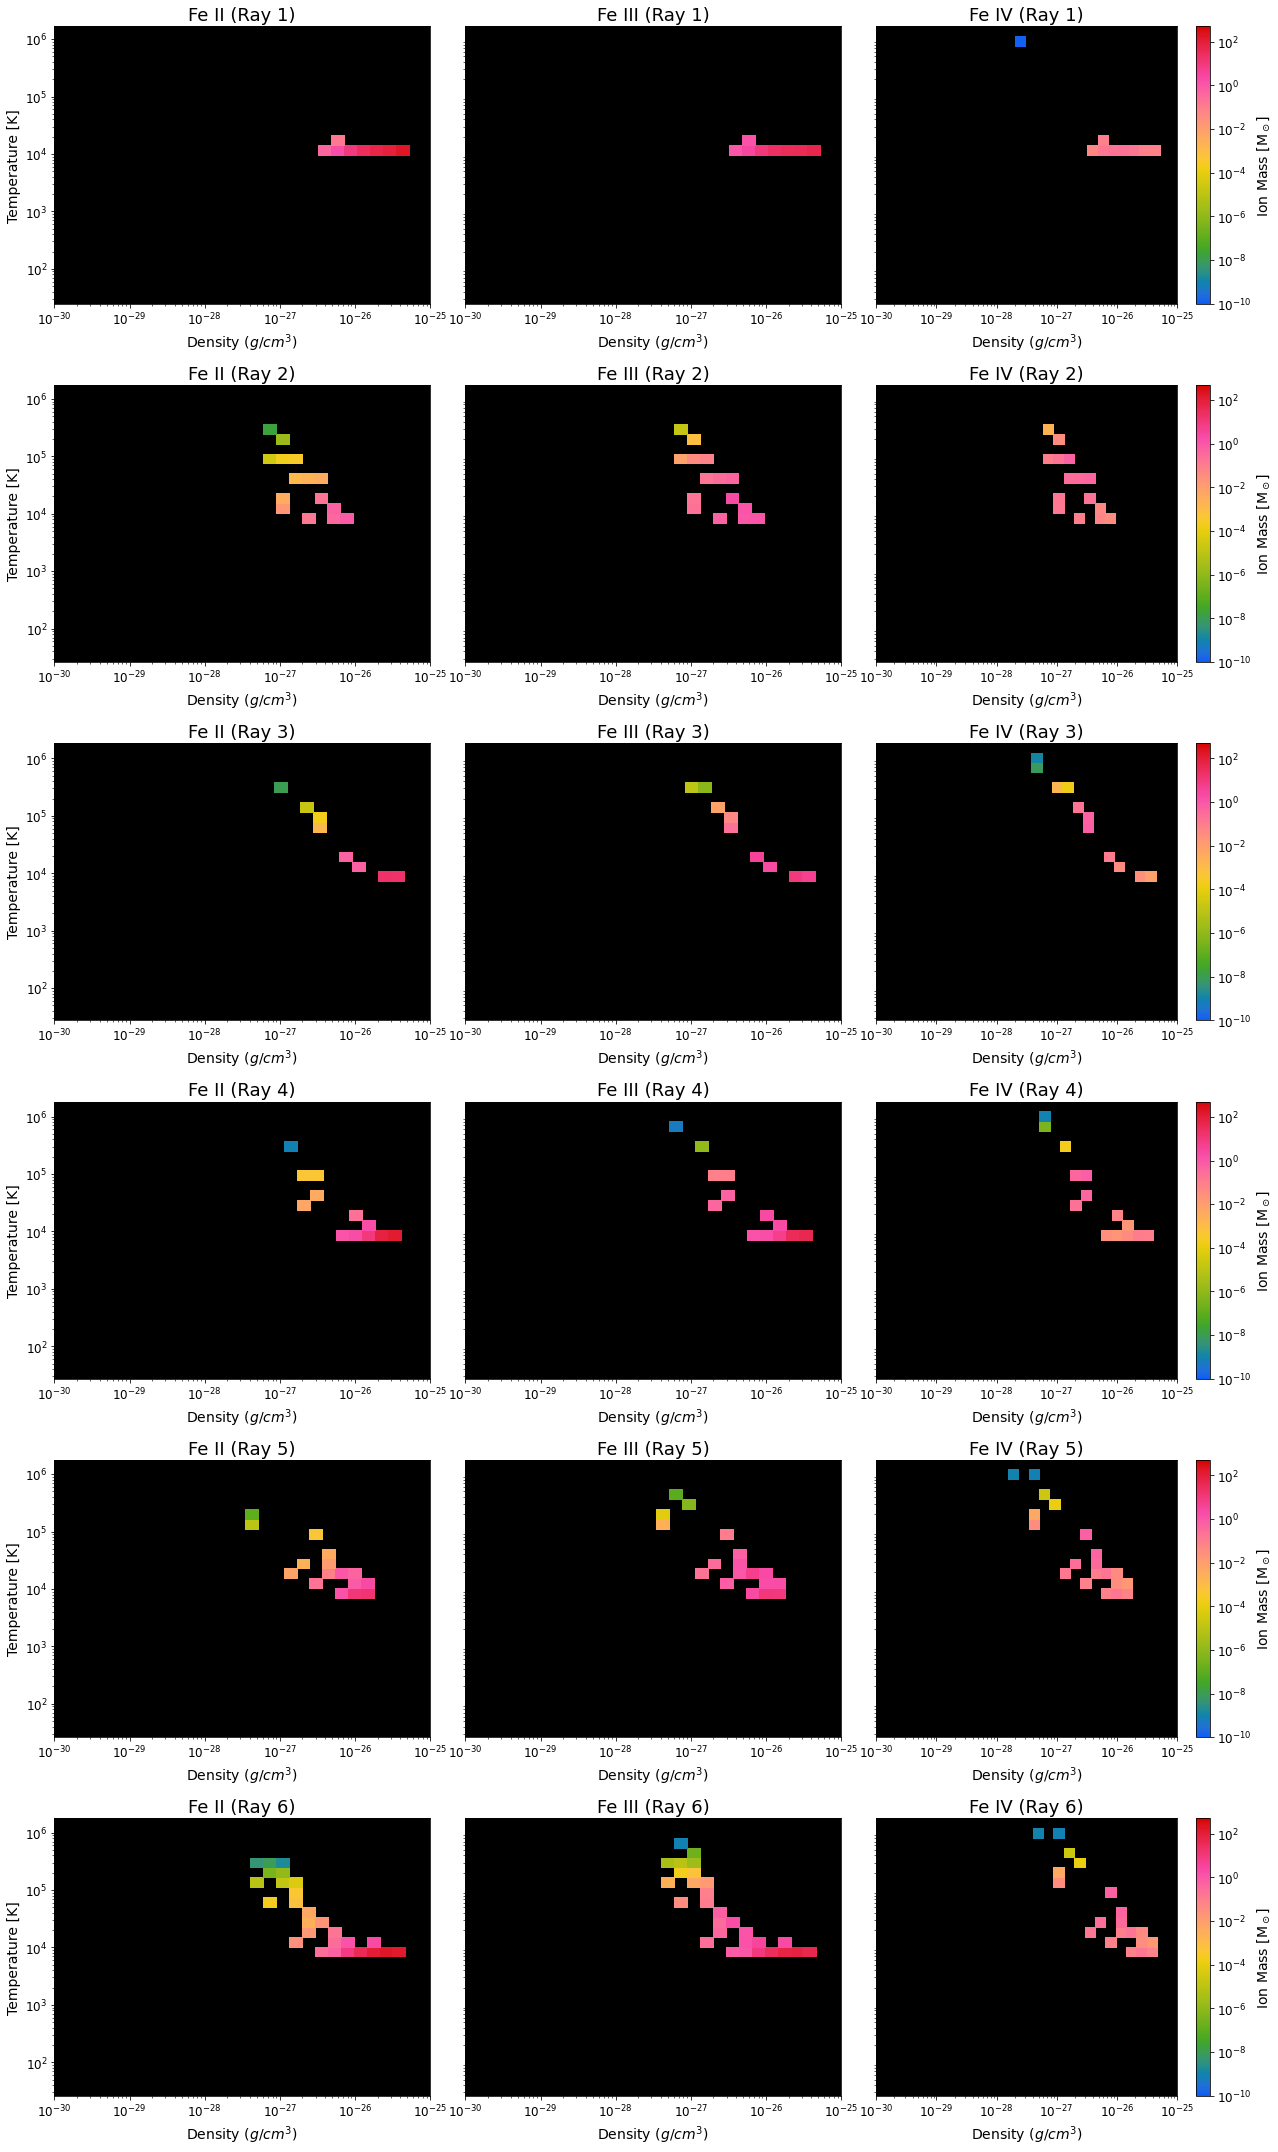

In [63]:
Fez = [FeII1, FeIII1, FeIV1, FeII2, FeIII2, FeIV2, FeII3, FeIII3, FeIV3,
      FeII4, FeIII4, FeIV4, FeII5, FeIII5, FeIV5, FeII7, FeIII7, FeIV7]
Fe_titles = name(['Fe II', 'Fe III', 'Fe IV'])
big_plot(xx,yy,Fez,Fe_titles, vmin_=10**-10, vmax_=5*10**2)

# Mg

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  2.179e+02
hist 1 max bin:  8.505e+01
hist 1 min bin:  1.845e-01
 
hist 2 sum:  1.340e+02
hist 2 max bin:  4.080e+01
hist 2 min bin:  6.144e-01


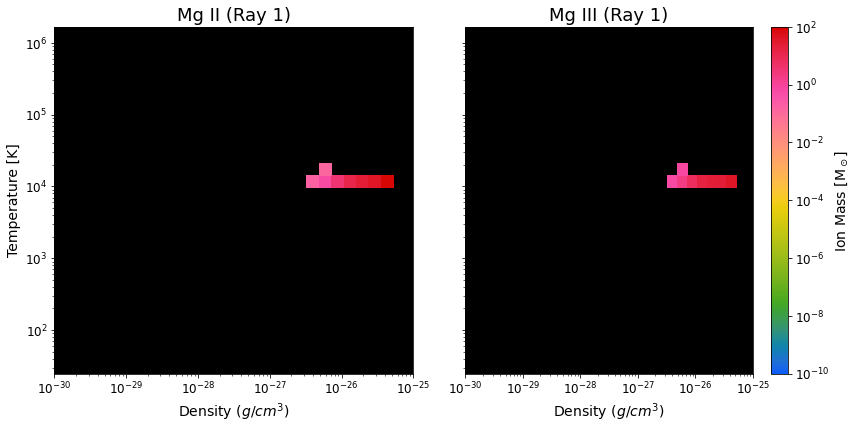

In [64]:
MgII1 = np.array(ray1.all_data()['Mg_p1_mass'])/M
MgIII1 = np.array(ray1.all_data()['Mg_p2_mass'])/M

plot2(den,temp,[MgII1,MgIII1], ['Mg II (Ray 1)', 'Mg III (Ray 1)'], four=False, 
      vmin_=10**-10, vmax_= 10**2)

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  2.969e+00
hist 1 max bin:  1.939e+00
hist 1 min bin:  1.805e-06
 
hist 2 sum:  7.831e+00
hist 2 max bin:  2.498e+00
hist 2 min bin:  2.425e-02


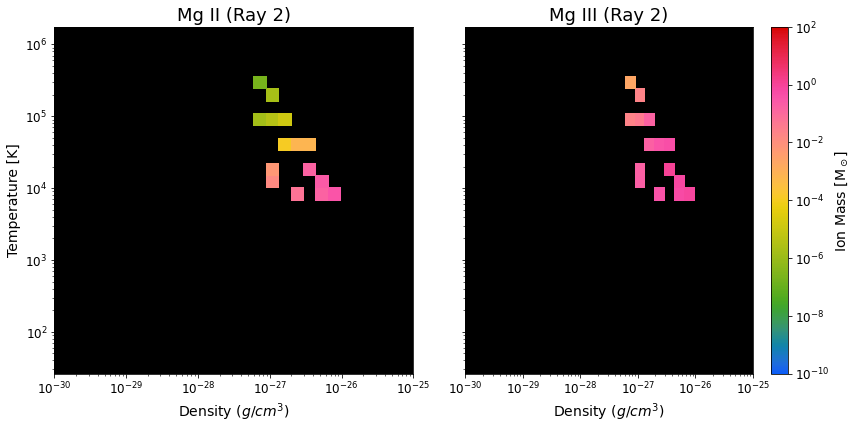

In [65]:
MgII2 = np.array(ray2.all_data()['Mg_p1_mass'])/M
MgIII2 = np.array(ray2.all_data()['Mg_p2_mass'])/M

plot2(den2,temp2,[MgII2,MgIII2], ['Mg II (Ray 2)', 'Mg III (Ray 2)'], four=False, 
      vmin_=10**-10, vmax_= 10**2)

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  4.614e+01
hist 1 max bin:  2.737e+01
hist 1 min bin:  1.804e-08
 
hist 2 sum:  2.552e+01
hist 2 max bin:  1.035e+01
hist 2 min bin:  4.932e-09


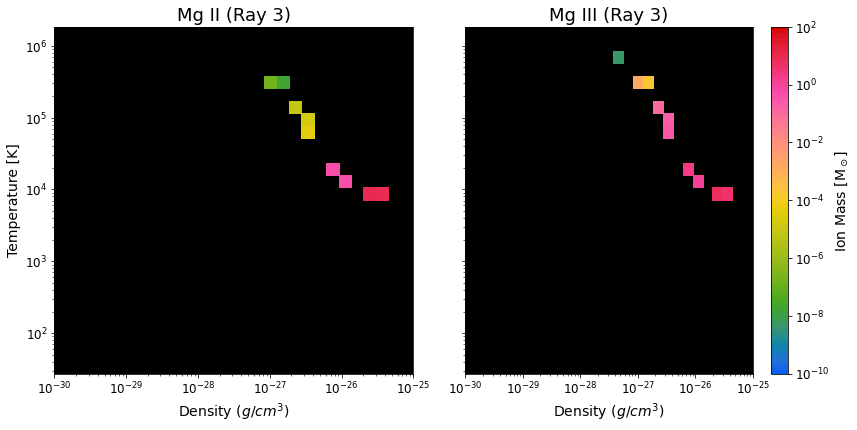

In [66]:
MgII3 = np.array(ray3.all_data()['Mg_p1_mass'])/M
MgIII3 = np.array(ray3.all_data()['Mg_p2_mass'])/M

plot2(den3,temp3,[MgII3,MgIII3], ['Mg II (Ray 3)', 'Mg III (Ray 3)'], four=False, 
      vmin_=10**-10, vmax_= 10**2)

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  1.101e+02
hist 1 max bin:  5.993e+01
hist 1 min bin:  2.402e-08
 
hist 2 sum:  7.394e+01
hist 2 max bin:  3.467e+01
hist 2 min bin:  3.761e-07


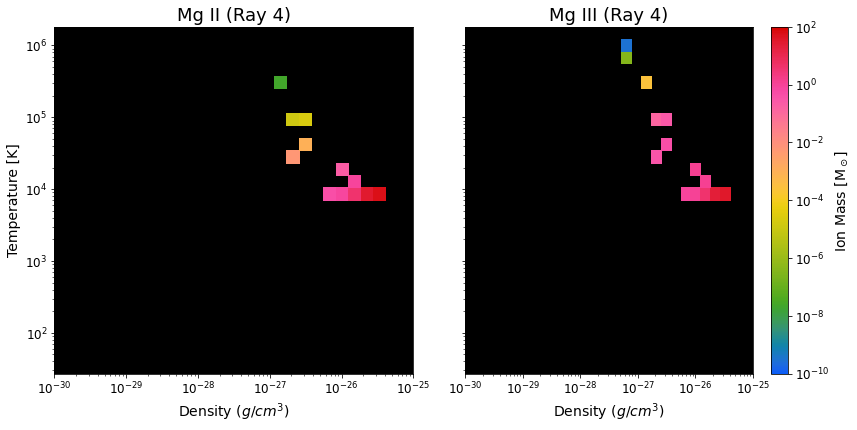

In [67]:
MgII4 = np.array(ray4.all_data()['Mg_p1_mass'])/M
MgIII4 = np.array(ray4.all_data()['Mg_p2_mass'])/M

plot2(den4,temp4,[MgII4,MgIII4], ['Mg II (Ray 4)', 'Mg III (Ray 4)'], four=False, 
      vmin_=10**-10, vmax_= 10**2)

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  5.321e+01
hist 1 max bin:  3.857e+01
hist 1 min bin:  2.388e-09
 
hist 2 sum:  5.731e+01
hist 2 max bin:  3.155e+01
hist 2 min bin:  4.954e-10


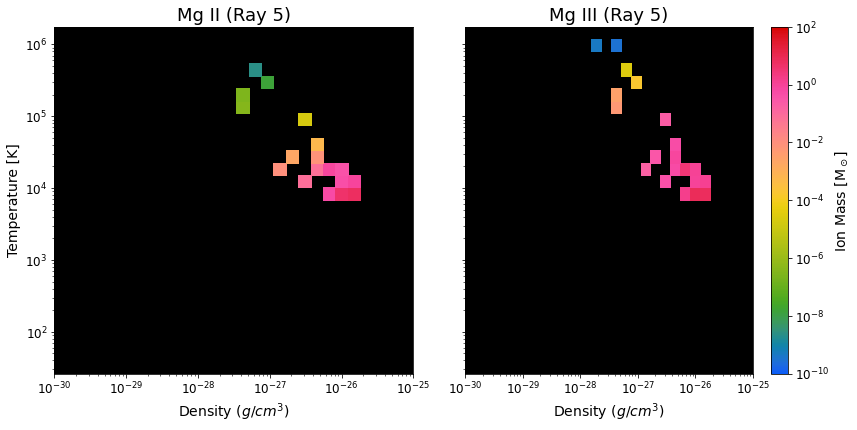

In [68]:
MgII5 = np.array(ray5.all_data()['Mg_p1_mass'])/M
MgIII5 = np.array(ray5.all_data()['Mg_p2_mass'])/M

plot2(den5,temp5,[MgII5,MgIII5], ['Mg II (Ray 5)', 'Mg III (Ray 5)'], four=False, 
      vmin_=10**-10, vmax_= 10**2)

<ipython-input-3-553b29072bbd>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-3-553b29072bbd>:135: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


hist 1 sum:  2.596e+02
hist 1 max bin:  7.903e+01
hist 1 min bin:  5.810e-07
 
hist 2 sum:  1.960e+02
hist 2 max bin:  5.717e+01
hist 2 min bin:  1.578e-10


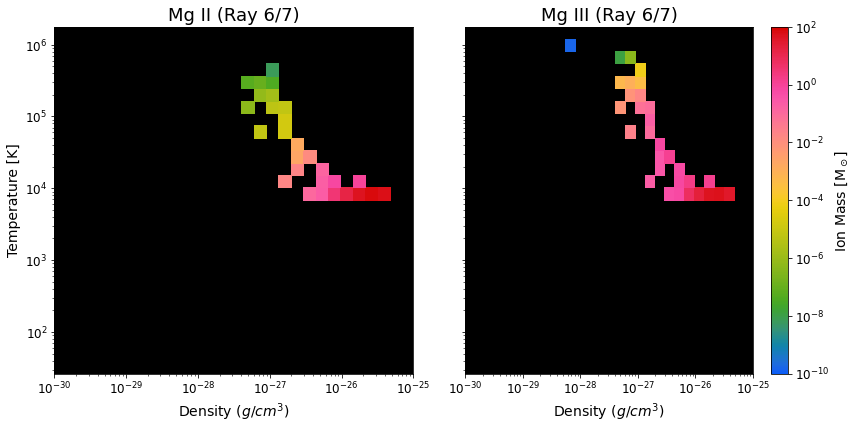

In [70]:
MgII7 = np.array(ray7.all_data()['Mg_p1_mass'])/M
MgIII7 = np.array(ray7.all_data()['Mg_p2_mass'])/M

plot2(den7,temp7,[MgII7,MgIII7], ['Mg II (Ray 6/7)', 'Mg III (Ray 6/7)'], four=False,
     vmin_=10**-10, vmax_= 10**2)

<ipython-input-4-eb5abf27fbb0>:428: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist1.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:448: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist2.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")
<ipython-input-4-eb5abf27fbb0>:468: MatplotlibDeprecationWarning: shading='flat' when X and Y have

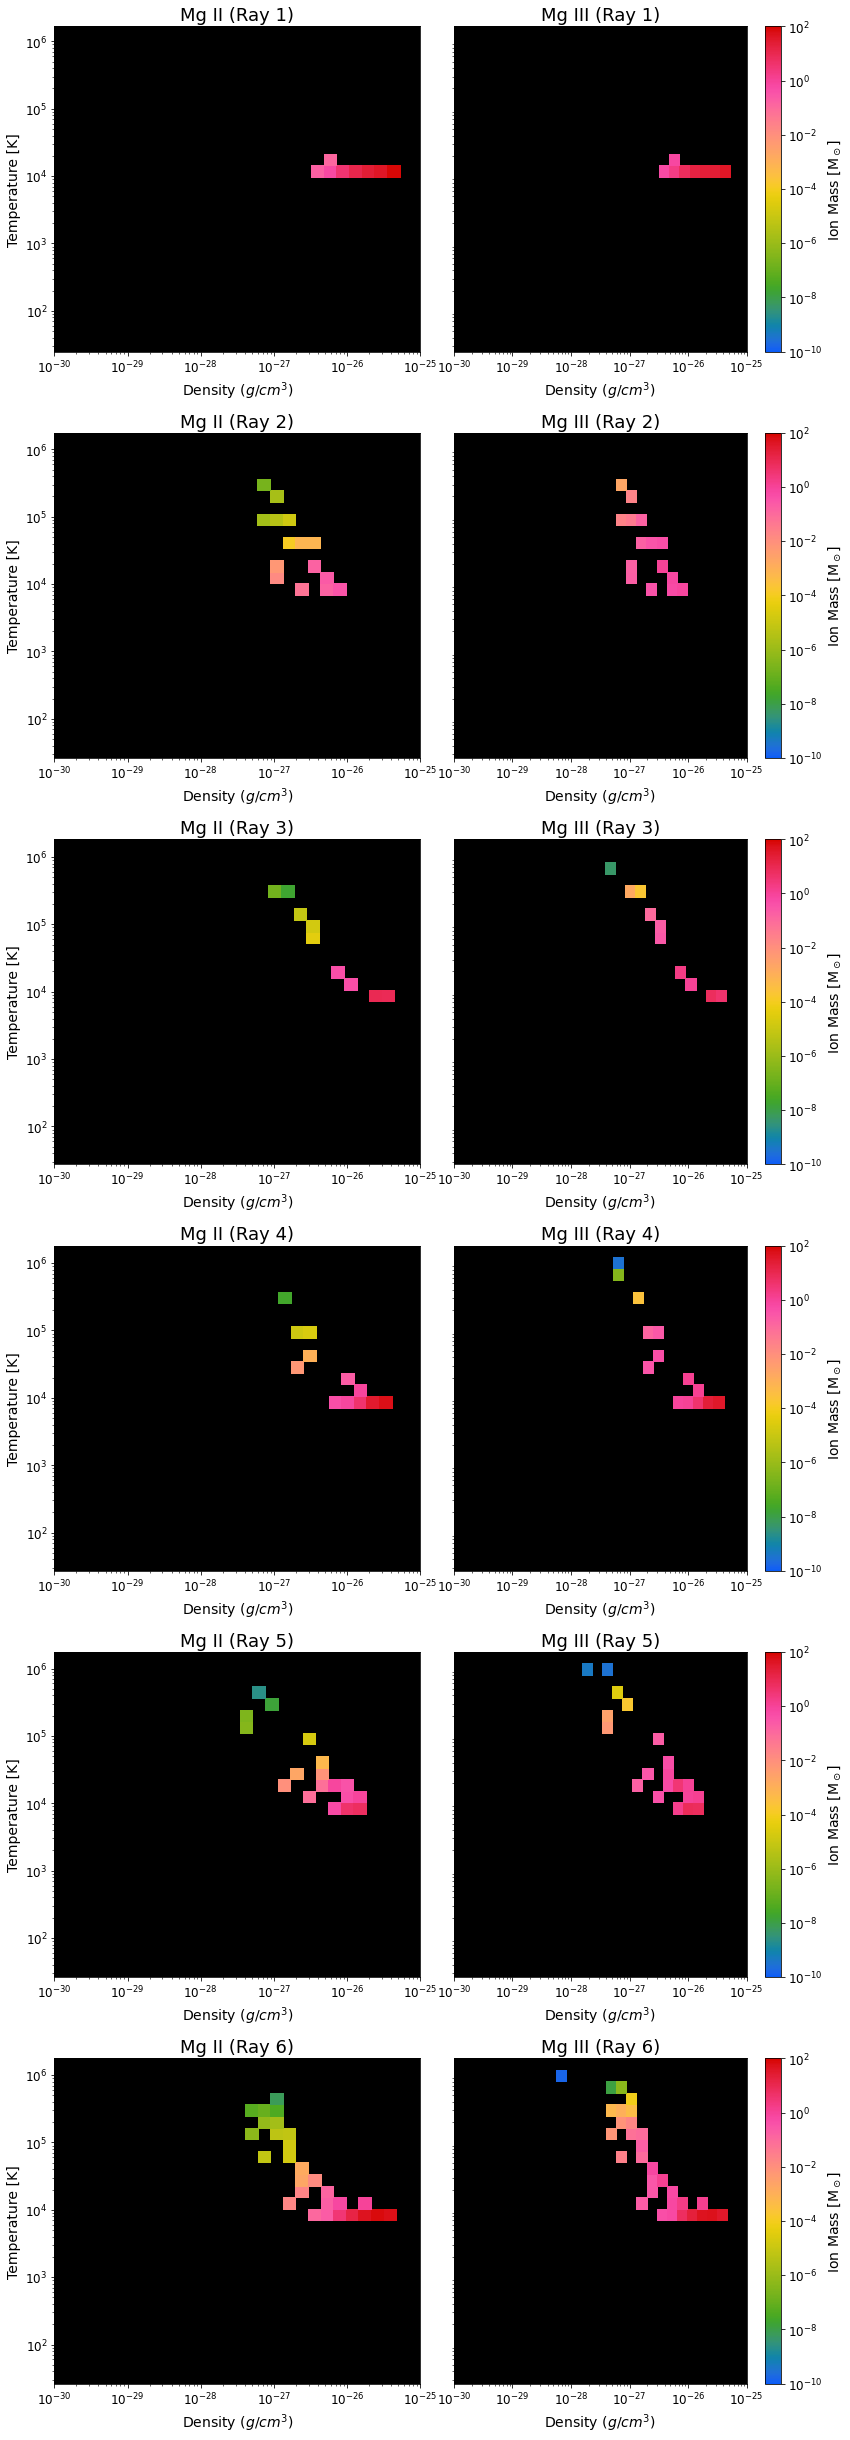

In [71]:
Mgz = [MgII1, MgIII1, MgII2, MgIII2, MgII3, MgIII3,
      MgII4, MgIII4, MgII5, MgIII5, MgII7, MgIII7]
Mg_titles = name(['Mg II', 'Mg III'])
big_plot(xx,yy,Mgz,Mg_titles, four=False, vmin_=10**-10, vmax_= 10**2)